# Heicoders Professional AI200 July 2021: Human or Robot?

This is the code that my team produced for Heicoders Professional AI200 July 2021 internal Kaggle competition named 'Human or Robot'. This InClass Prediction Challenge is modelled after the 2015 Facebook Recruitment Challenge, a prediction competition jointly held by Facebook and Kaggle.

## File descriptions
* train.csv - the training set from the bidder dataset
* test.csv - the test set from the bidder dataset
* sample-submission.csv - a sample submission file in the correct format
* bids.csv - the bid dataset

## Data fields
### For the bidder dataset

* bidder_id – Unique identifier of a bidder.
* payment_account – Payment account associated with a bidder. These are obfuscated to protect privacy.
* address – Mailing address of a bidder. These are obfuscated to protect privacy.
* outcome – Label of a bidder indicating whether or not it is a robot. Value 1.0 indicates a robot, where value 0.0 indicates human.
The outcome was half hand labeled, half stats-based. There are two types of "bots" with different levels of proof:
    1. Bidders who are identified as bots/fraudulent with clear proof. Their accounts were banned by the auction site.
    2. Bidder who may have just started their business/clicks or their stats exceed from system wide average. There are no clear proof that they are bots.

### For the bid dataset

* bid_id - unique id for this bid
* bidder_id – Unique identifier of a bidder (same as the bidder_id used in train.csv and test.csv)
* auction – Unique identifier of an auction
* merchandise – The category of the auction site campaign, which means the bidder might come to this site by way of searching for "home goods" but ended up bidding for "sporting goods" - and that leads to this field being "home goods". This categorical field could be a search term, or online advertisement.
* device – Phone model of a visitor
* time - Time that the bid is made (transformed to protect privacy).
* country - The country that the IP belongs to
* ip – IP address of a bidder (obfuscated to protect privacy).
* url - url where the bidder was referred from (obfuscated to protect privacy).

In [1]:
# Standard Import 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from functools import reduce

## Load All Dataset

In [2]:
bids_df = pd.read_csv('Data/bids.csv')
bids_df.head()

,bidder_id,auction,merchandise,device,time,country,ip,url
0,6b18a5b1eb756ed0968e726077ac6f574a163,hfwg0,sporting goods,phone4261,9631916842105263,cz,58.66.142.81,kiepbuv7y92mx3t
1,94587f4554fd3b271147490c35a27549f89f7,22iq4,jewelry,phone738,9631916842105263,ru,95.161.165.11,4sqivcoh12vctv7
2,cfe767f0e4cd7c62515326a795a661c422dcc,w69k8,mobile,phone3459,9631916842105263,lt,75.233.227.15,ae97emyjh9trong
3,73fe2fb4f9d657de35ccf3ad4fc8c1603e43c,k8pyh,jewelry,phone3459,9631916842105263,sa,49.252.224.185,26mecamx4l5vhiq
4,39ce4ad64b91b87b9f6e31064644f7a011b04,c1ok3,office equipment,phone3311,9631916842105263,tr,54.83.204.113,ae97emyjh9trong


In [3]:
train_df = pd.read_csv('Data/train.csv')
train_df.head()

,bidder_id,payment_account,address,outcome
0,3758013f9a2c4f9d8670e709d9e8beaba6f57,32a6f444ff094840b58be6bb6db6a04fe4f85,4f2ed7fc454d535ecba88bc7f854925dfe4ab,0.0
1,8a12c97c9dac9ef7fcbbceaf7522447cf6e49,eb0ae407d20ab19351c5271abe4ca12ce84c0,1c73853ef410e4095382f8d6ddeb0b9d22bb0,0.0
2,27b3a0fecc63bf830bc44961c90f330308364,87dbae72fd15fa13f14217e47f32fa0ea9417,c4bbeba55def4b3861ac24cc5efd82b886b9b,0.0
3,2a2b18bbdfa736637911cf407799b409112a2,40a0df1d610ef30a8f01d48198ab60bee51e2,021918f1b3fc828970b230eaf4d49f8a93b95,0.0
4,3fdc7c645e5e131c05f1ae112dbae407523c5,3d20d9941901359e5fed3dfc0c5bf45dfd968,d6331a777cabb7c5df46c6a0377136b904614,0.0


In [4]:
test_df = pd.read_csv('Data/test.csv')
test_df.head()

,bidder_id,payment_account,address
0,0013f9b8d1f462df4462e1c1216e441ba6e18,b533766504f7cac1380ad70e4ae21ae29d83e,c8c25695d81d1bec3645b43a0d1107de014ae
1,0014e3b911d1420e43ced1dc4fc18fde0fd0c,f7e5e84d873cf8595077c2ecdf7059dec4544,b898d2e8088f4ff9823b8b8883886720bf44a
2,002828f800c5132e297cfe3d44fbde9aeac51,218b41ac41d259b11e52c2cf5a947c040ec1a,bb386f62212f98f6c5e25d5f81dc64069efe0
3,0040cea6b93afd86768c365d89513ffb7c0ba,27eb8ae5e2eebd813b4e848c31a2a1507e0ab,16054860ef1c4ec72ec5da8d92047b8a983ee
4,00512db4ae953baed983a4bcfa335e7412013,553384bd9bb0551f5a9dc3118929c54d9ff8a,fb24aee263866fa218090ae99b374f354816b


## Data Exploration

### bids.csv

In [5]:
print(f'Number of entries            :{len(bids_df)}')
print(f'Number of unique bidder_id   :{bids_df.bidder_id.nunique()}')
print(f'Number of unique auction     :{bids_df.auction.nunique()}')
print(f'Number of unique merchandise :{bids_df.merchandise.nunique()}')
print(f'Number of unique device      :{bids_df.device.nunique()}')
print(f'Number of unique time        :{bids_df.time.nunique()}')
print(f'Number of unique country     :{bids_df.country.nunique()}')
print(f'Number of unique ip          :{bids_df.ip.nunique()}')
print(f'Number of unique url         :{bids_df.url.nunique()}')

Number of entries            :7656334
Number of unique bidder_id   :6614
Number of unique auction     :15051
Number of unique merchandise :10
Number of unique device      :7351
Number of unique time        :776529
Number of unique country     :199
Number of unique ip          :2303991
Number of unique url         :1786351


### train.csv

In [6]:
print(f'Number of entries                :{len(train_df)}')
print(f'Number of unique bidder_id       :{train_df.bidder_id.nunique()}')
print(f'Number of unique payment_account :{train_df.payment_account.nunique()}')
print(f'Number of unique address         :{train_df.address.nunique()}')
print(f'Number of unique outcome         :{train_df.outcome.nunique()}')
print(f'Number of bot in train_data      :{len(train_df[train_df.outcome == 1])}')
print(f'Number of human in train_data    :{len(train_df[train_df.outcome == 0])}')
print(f'Bot to human ratio               :{len(train_df[train_df.outcome == 1])/len(train_df[train_df.outcome == 0])}')

Number of entries                :2013
Number of unique bidder_id       :2013
Number of unique payment_account :2013
Number of unique address         :2013
Number of unique outcome         :2
Number of bot in train_data      :103
Number of human in train_data    :1910
Bot to human ratio               :0.05392670157068063


### test.csv

In [7]:
print(f'Number of entries                :{len(test_df)}')
print(f'Number of unique bidder_id       :{test_df.bidder_id.nunique()}')
print(f'Number of unique payment_account :{test_df.payment_account.nunique()}')
print(f'Number of unique address         :{test_df.address.nunique()}')

Number of entries                :4700
Number of unique bidder_id       :4700
Number of unique payment_account :4700
Number of unique address         :4700


## Data Extraction

### Training Data

#### Auction

In [8]:
no_of_auction_per_bidder = bids_df.groupby(by='bidder_id')['auction'].count().reset_index()
no_of_auction_per_bidder.rename(columns={'auction':'no_of_auction_per_bidder'},inplace=True)

no_of_unique_auction_id_per_bidder = bids_df.groupby(by='bidder_id')['auction'].nunique().reset_index()
no_of_unique_auction_id_per_bidder.rename(columns={'auction':'no_of_unique_auction_id_per_bidder'},inplace=True)

average_auction_per_bidder = no_of_auction_per_bidder['no_of_auction_per_bidder'] / no_of_unique_auction_id_per_bidder['no_of_unique_auction_id_per_bidder']
average_auction_per_bidder = pd.DataFrame(data ={'bidder_id':no_of_auction_per_bidder['bidder_id']
                                                 ,'average_auction_per_bidder':average_auction_per_bidder})

avg_auction_counts_per_device = bids_df.groupby(['bidder_id','device'])['auction'].nunique().reset_index().groupby(['bidder_id'])['auction'].mean().reset_index()
avg_auction_counts_per_device.rename(columns={'auction':'avg_auction_counts_per_device'},inplace=True)

max_auction_counts_per_device = bids_df.groupby(['bidder_id','device'])['auction'].nunique().reset_index().groupby(['bidder_id'])['auction'].max().reset_index()
max_auction_counts_per_device.rename(columns={'auction':'max_auction_counts_per_device'},inplace=True)

min_auction_counts_per_device = bids_df.groupby(['bidder_id','device'])['auction'].nunique().reset_index().groupby(['bidder_id'])['auction'].min().reset_index()
min_auction_counts_per_device.rename(columns={'auction':'min_auction_counts_per_device'},inplace=True)

avg_auction_counts_per_country = bids_df.groupby(['bidder_id','country'])['auction'].nunique().reset_index().groupby(['bidder_id'])['auction'].mean().reset_index()
avg_auction_counts_per_country.rename(columns={'auction':'avg_auction_counts_per_country'},inplace=True)

max_auction_counts_per_country = bids_df.groupby(['bidder_id','country'])['auction'].nunique().reset_index().groupby(['bidder_id'])['auction'].max().reset_index()
max_auction_counts_per_country.rename(columns={'auction':'max_auction_counts_per_country'},inplace=True)

min_auction_counts_per_country = bids_df.groupby(['bidder_id','country'])['auction'].nunique().reset_index().groupby(['bidder_id'])['auction'].min().reset_index()
min_auction_counts_per_country.rename(columns={'auction':'min_auction_counts_per_country'},inplace=True)

avg_auction_counts_per_ip = bids_df.groupby(['bidder_id','ip'])['auction'].nunique().reset_index().groupby(['bidder_id'])['auction'].mean().reset_index()
avg_auction_counts_per_ip.rename(columns={'auction':'avg_auction_counts_per_ip'},inplace=True)

max_auction_counts_per_ip = bids_df.groupby(['bidder_id','ip'])['auction'].nunique().reset_index().groupby(['bidder_id'])['auction'].max().reset_index()
max_auction_counts_per_ip.rename(columns={'auction':'max_auction_counts_per_ip'},inplace=True)

min_auction_counts_per_ip = bids_df.groupby(['bidder_id','ip'])['auction'].nunique().reset_index().groupby(['bidder_id'])['auction'].min().reset_index()
min_auction_counts_per_ip.rename(columns={'auction':'min_auction_counts_per_ip'},inplace=True)

avg_auction_counts_per_url = bids_df.groupby(['bidder_id','url'])['auction'].nunique().reset_index().groupby(['bidder_id'])['auction'].mean().reset_index()
avg_auction_counts_per_url.rename(columns={'auction':'avg_auction_counts_per_url'},inplace=True)

max_auction_counts_per_url = bids_df.groupby(['bidder_id','url'])['auction'].nunique().reset_index().groupby(['bidder_id'])['auction'].max().reset_index()
max_auction_counts_per_url.rename(columns={'auction':'max_auction_counts_per_url'},inplace=True)

min_auction_counts_per_url = bids_df.groupby(['bidder_id','url'])['auction'].nunique().reset_index().groupby(['bidder_id'])['auction'].min().reset_index()
min_auction_counts_per_url.rename(columns={'auction':'min_auction_counts_per_url'},inplace=True)


In [9]:
auction_dataframe = [no_of_auction_per_bidder,
                     no_of_unique_auction_id_per_bidder,
                     average_auction_per_bidder,
                     avg_auction_counts_per_device,
                     max_auction_counts_per_device,
                     min_auction_counts_per_device,
                     avg_auction_counts_per_country,
                     max_auction_counts_per_country,
                     min_auction_counts_per_country,
                     avg_auction_counts_per_ip,
                     max_auction_counts_per_ip,
                     min_auction_counts_per_ip,
                     avg_auction_counts_per_url,
                     max_auction_counts_per_url,
                     min_auction_counts_per_url
                     ]

auction_df = reduce(lambda left,right: pd.merge(left,right,on=['bidder_id'],
                                            how='left'),auction_dataframe)
auction_df.head()

,bidder_id,no_of_auction_per_bidder,no_of_unique_auction_id_per_bidder,average_auction_per_bidder,avg_auction_counts_per_device,max_auction_counts_per_device,min_auction_counts_per_device,avg_auction_counts_per_country,max_auction_counts_per_country,min_auction_counts_per_country,avg_auction_counts_per_ip,max_auction_counts_per_ip,min_auction_counts_per_ip,avg_auction_counts_per_url,max_auction_counts_per_url,min_auction_counts_per_url
0,0013f9b8d1f462df4462e1c1216e441ba6e18,8,6,1.333333,1.142857,2,1,3.000000,5.0,1.0,1.000000,1,1,1.750000,3,1
1,0014e3b911d1420e43ced1dc4fc18fde0fd0c,7,7,1.000000,1.000000,1,1,1.750000,4.0,1.0,1.000000,1,1,1.750000,3,1
2,002828f800c5132e297cfe3d44fbde9aeac51,2,2,1.000000,2.000000,2,2,2.000000,2.0,2.0,1.000000,1,1,2.000000,2,2
3,00402f50c4086f320cb6bf94f04462ea32441,249,89,2.797753,1.747475,14,1,4.761905,41.0,1.0,1.344371,9,1,1.897959,23,1
4,0040cea6b93afd86768c365d89513ffb7c0ba,31,23,1.347826,1.428571,3,1,3.833333,9.0,1.0,1.071429,3,1,7.500000,18,1


In [10]:
train_data1 = pd.merge(train_df,auction_df,on='bidder_id',how='left')
train_data1.head()

,bidder_id,payment_account,address,outcome,no_of_auction_per_bidder,no_of_unique_auction_id_per_bidder,average_auction_per_bidder,avg_auction_counts_per_device,max_auction_counts_per_device,min_auction_counts_per_device,avg_auction_counts_per_country,max_auction_counts_per_country,min_auction_counts_per_country,avg_auction_counts_per_ip,max_auction_counts_per_ip,min_auction_counts_per_ip,avg_auction_counts_per_url,max_auction_counts_per_url,min_auction_counts_per_url
0,3758013f9a2c4f9d8670e709d9e8beaba6f57,32a6f444ff094840b58be6bb6db6a04fe4f85,4f2ed7fc454d535ecba88bc7f854925dfe4ab,0.0,50.0,25.0,2.000000,1.500000,5.0,1.0,3.250000,10.0,1.0,1.270270,4.0,1.0,2.400000,10.0,1.0
1,8a12c97c9dac9ef7fcbbceaf7522447cf6e49,eb0ae407d20ab19351c5271abe4ca12ce84c0,1c73853ef410e4095382f8d6ddeb0b9d22bb0,0.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.000000,1.0,1.0,1.000000,1.0,1.0,1.000000,1.0,1.0
2,27b3a0fecc63bf830bc44961c90f330308364,87dbae72fd15fa13f14217e47f32fa0ea9417,c4bbeba55def4b3861ac24cc5efd82b886b9b,0.0,3.0,2.0,1.500000,2.000000,2.0,2.0,1.000000,1.0,1.0,1.000000,1.0,1.0,1.500000,2.0,1.0
3,2a2b18bbdfa736637911cf407799b409112a2,40a0df1d610ef30a8f01d48198ab60bee51e2,021918f1b3fc828970b230eaf4d49f8a93b95,0.0,61.0,33.0,1.848485,1.954545,17.0,1.0,8.250000,27.0,2.0,1.676471,5.0,1.0,4.444444,21.0,1.0
4,3fdc7c645e5e131c05f1ae112dbae407523c5,3d20d9941901359e5fed3dfc0c5bf45dfd968,d6331a777cabb7c5df46c6a0377136b904614,0.0,3184.0,377.0,8.445623,4.378788,78.0,1.0,6.819444,105.0,1.0,1.192407,15.0,1.0,9.500000,163.0,1.0


In [11]:
train_data1.drop(columns=['payment_account','address'],inplace=True)
train_data1.head()

,bidder_id,outcome,no_of_auction_per_bidder,no_of_unique_auction_id_per_bidder,average_auction_per_bidder,avg_auction_counts_per_device,max_auction_counts_per_device,min_auction_counts_per_device,avg_auction_counts_per_country,max_auction_counts_per_country,min_auction_counts_per_country,avg_auction_counts_per_ip,max_auction_counts_per_ip,min_auction_counts_per_ip,avg_auction_counts_per_url,max_auction_counts_per_url,min_auction_counts_per_url
0,3758013f9a2c4f9d8670e709d9e8beaba6f57,0.0,50.0,25.0,2.000000,1.500000,5.0,1.0,3.250000,10.0,1.0,1.270270,4.0,1.0,2.400000,10.0,1.0
1,8a12c97c9dac9ef7fcbbceaf7522447cf6e49,0.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.000000,1.0,1.0,1.000000,1.0,1.0,1.000000,1.0,1.0
2,27b3a0fecc63bf830bc44961c90f330308364,0.0,3.0,2.0,1.500000,2.000000,2.0,2.0,1.000000,1.0,1.0,1.000000,1.0,1.0,1.500000,2.0,1.0
3,2a2b18bbdfa736637911cf407799b409112a2,0.0,61.0,33.0,1.848485,1.954545,17.0,1.0,8.250000,27.0,2.0,1.676471,5.0,1.0,4.444444,21.0,1.0
4,3fdc7c645e5e131c05f1ae112dbae407523c5,0.0,3184.0,377.0,8.445623,4.378788,78.0,1.0,6.819444,105.0,1.0,1.192407,15.0,1.0,9.500000,163.0,1.0


In [12]:
train_data1.shape

(2013, 17)

#### Device

In [13]:
no_of_device_per_bidder = bids_df.groupby(by='bidder_id')['device'].count().reset_index()
no_of_device_per_bidder.rename(columns={'device':'no_of_device_per_bidder'},inplace=True)

no_of_unique_device_per_bidder = bids_df.groupby(by='bidder_id')['device'].nunique().reset_index()
no_of_unique_device_per_bidder.rename(columns={'device':'no_of_unique_device_per_bidder'},inplace=True)

average_device_per_bidder = no_of_device_per_bidder['no_of_device_per_bidder'] / no_of_unique_device_per_bidder['no_of_unique_device_per_bidder']
average_device_per_bidder = pd.DataFrame(data ={'bidder_id':no_of_device_per_bidder['bidder_id']
                                                 ,'average_device_per_bidder':average_device_per_bidder})

avg_device_counts_per_auction = bids_df.groupby(['bidder_id','auction'])['device'].nunique().reset_index().groupby(['bidder_id'])['device'].mean().reset_index()
avg_device_counts_per_auction.rename(columns={'device':'avg_device_counts_per_auction'},inplace=True)

max_device_counts_per_auction = bids_df.groupby(['bidder_id','auction'])['device'].nunique().reset_index().groupby(['bidder_id'])['device'].max().reset_index()
max_device_counts_per_auction.rename(columns={'device':'max_device_counts_per_auction'},inplace=True)

min_device_counts_per_auction = bids_df.groupby(['bidder_id','auction'])['device'].nunique().reset_index().groupby(['bidder_id'])['device'].min().reset_index()
min_device_counts_per_auction.rename(columns={'device':'min_device_counts_per_auction'},inplace=True)

avg_device_counts_per_country = bids_df.groupby(['bidder_id','country'])['device'].nunique().reset_index().groupby(['bidder_id'])['device'].mean().reset_index()
avg_device_counts_per_country.rename(columns={'device':'avg_device_counts_per_country'},inplace=True)

max_device_counts_per_country = bids_df.groupby(['bidder_id','country'])['device'].nunique().reset_index().groupby(['bidder_id'])['device'].max().reset_index()
max_device_counts_per_country.rename(columns={'device':'max_device_counts_per_country'},inplace=True)

min_device_counts_per_country = bids_df.groupby(['bidder_id','country'])['device'].nunique().reset_index().groupby(['bidder_id'])['device'].min().reset_index()
min_device_counts_per_country.rename(columns={'device':'min_device_counts_per_country'},inplace=True)

avg_device_counts_per_ip = bids_df.groupby(['bidder_id','ip'])['device'].nunique().reset_index().groupby(['bidder_id'])['device'].mean().reset_index()
avg_device_counts_per_ip.rename(columns={'device':'avg_device_counts_per_ip'},inplace=True)

max_device_counts_per_ip = bids_df.groupby(['bidder_id','ip'])['device'].nunique().reset_index().groupby(['bidder_id'])['device'].max().reset_index()
max_device_counts_per_ip.rename(columns={'device':'max_device_counts_per_ip'},inplace=True)

min_device_counts_per_ip = bids_df.groupby(['bidder_id','ip'])['device'].nunique().reset_index().groupby(['bidder_id'])['device'].min().reset_index()
min_device_counts_per_ip.rename(columns={'device':'min_device_counts_per_ip'},inplace=True)

avg_device_counts_per_url = bids_df.groupby(['bidder_id','url'])['device'].nunique().reset_index().groupby(['bidder_id'])['device'].mean().reset_index()
avg_device_counts_per_url.rename(columns={'device':'avg_device_counts_per_url'},inplace=True)

max_device_counts_per_url = bids_df.groupby(['bidder_id','url'])['device'].nunique().reset_index().groupby(['bidder_id'])['device'].max().reset_index()
max_device_counts_per_url.rename(columns={'device':'max_device_counts_per_url'},inplace=True)

min_device_counts_per_url = bids_df.groupby(['bidder_id','url'])['device'].nunique().reset_index().groupby(['bidder_id'])['device'].min().reset_index()
min_device_counts_per_url.rename(columns={'device':'min_device_counts_per_url'},inplace=True)

In [14]:
device_dataframe = [no_of_device_per_bidder,
                     no_of_unique_device_per_bidder,
                     average_device_per_bidder,
                     avg_device_counts_per_auction,
                     min_device_counts_per_auction,
                     max_device_counts_per_auction,
                     avg_device_counts_per_country,
                     max_device_counts_per_country,
                     min_device_counts_per_country,
                     avg_device_counts_per_ip,
                     max_device_counts_per_ip,
                     min_device_counts_per_ip,
                     avg_device_counts_per_url,
                     max_device_counts_per_url,
                     min_device_counts_per_url
                     ]

device_df = reduce(lambda left,right: pd.merge(left,right,on=['bidder_id'],
                                            how='left'),device_dataframe)
device_df.head()

,bidder_id,no_of_device_per_bidder,no_of_unique_device_per_bidder,average_device_per_bidder,avg_device_counts_per_auction,min_device_counts_per_auction,max_device_counts_per_auction,avg_device_counts_per_country,max_device_counts_per_country,min_device_counts_per_country,avg_device_counts_per_ip,max_device_counts_per_ip,min_device_counts_per_ip,avg_device_counts_per_url,max_device_counts_per_url,min_device_counts_per_url
0,0013f9b8d1f462df4462e1c1216e441ba6e18,8,7,1.142857,1.333333,1,3,3.500000,6.0,1.0,1.000000,1,1,1.750000,3,1
1,0014e3b911d1420e43ced1dc4fc18fde0fd0c,7,7,1.000000,1.000000,1,1,1.750000,4.0,1.0,1.000000,1,1,1.750000,3,1
2,002828f800c5132e297cfe3d44fbde9aeac51,2,1,2.000000,1.000000,1,1,1.000000,1.0,1.0,1.000000,1,1,1.000000,1,1
3,00402f50c4086f320cb6bf94f04462ea32441,249,99,2.515152,1.943820,1,37,5.666667,45.0,1.0,1.198675,5,1,1.857143,23,1
4,0040cea6b93afd86768c365d89513ffb7c0ba,31,21,1.476190,1.304348,1,3,3.833333,9.0,1.0,1.000000,1,1,5.750000,14,1


In [15]:
train_data2 = pd.merge(train_data1,device_df,on='bidder_id',how='left')
train_data2.head()

,bidder_id,outcome,no_of_auction_per_bidder,no_of_unique_auction_id_per_bidder,average_auction_per_bidder,avg_auction_counts_per_device,max_auction_counts_per_device,min_auction_counts_per_device,avg_auction_counts_per_country,max_auction_counts_per_country,...,max_device_counts_per_auction,avg_device_counts_per_country,max_device_counts_per_country,min_device_counts_per_country,avg_device_counts_per_ip,max_device_counts_per_ip,min_device_counts_per_ip,avg_device_counts_per_url,max_device_counts_per_url,min_device_counts_per_url
0,3758013f9a2c4f9d8670e709d9e8beaba6f57,0.0,50.0,25.0,2.000000,1.500000,5.0,1.0,3.250000,10.0,...,9.0,4.000000,19.0,1.0,1.108108,3.0,1.0,2.533333,15.0,1.0
1,8a12c97c9dac9ef7fcbbceaf7522447cf6e49,0.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.000000,1.0,...,1.0,1.000000,1.0,1.0,1.000000,1.0,1.0,1.000000,1.0,1.0
2,27b3a0fecc63bf830bc44961c90f330308364,0.0,3.0,2.0,1.500000,2.000000,2.0,2.0,1.000000,1.0,...,1.0,1.000000,1.0,1.0,1.000000,1.0,1.0,1.000000,1.0,1.0
3,2a2b18bbdfa736637911cf407799b409112a2,0.0,61.0,33.0,1.848485,1.954545,17.0,1.0,8.250000,27.0,...,4.0,5.750000,16.0,1.0,1.235294,2.0,1.0,2.888889,11.0,1.0
4,3fdc7c645e5e131c05f1ae112dbae407523c5,0.0,3184.0,377.0,8.445623,4.378788,78.0,1.0,6.819444,105.0,...,73.0,12.652778,293.0,1.0,1.229508,28.0,1.0,9.700000,132.0,1.0


In [16]:
train_data2.shape

(2013, 32)

#### Time

In [17]:
max_time_data = bids_df.groupby(by='bidder_id')['time'].max().reset_index()

min_time_data = bids_df.groupby(by='bidder_id')['time'].min().reset_index()

no_of_unique_time_per_bidder = bids_df.groupby(by='bidder_id')['time'].nunique().reset_index()
no_of_unique_time_per_bidder.rename(columns={'time':'no_of_unique_time_per_bidder'},inplace=True)

average_time_diff_bet_each_bids = ((max_time_data['time']-min_time_data['time']) / no_of_unique_time_per_bidder['no_of_unique_time_per_bidder'])
average_time_diff_bet_each_bids = pd.DataFrame(data ={'bidder_id':no_of_unique_time_per_bidder['bidder_id']
                                                 ,'average_time_diff_bet_each_bids':average_time_diff_bet_each_bids})

In [18]:
time_sorted_bids_df = bids_df.sort_values('time')
timediff_btw_same_bids = time_sorted_bids_df.groupby('bidder_id')['time'].diff()
timediff_btw_same_bids_df = pd.concat([time_sorted_bids_df['bidder_id'],timediff_btw_same_bids],axis=1)

avg_timediff_btw_bids_data = timediff_btw_same_bids_df.groupby(by='bidder_id')['time'].mean().reset_index()
avg_timediff_btw_bids_data.rename(columns={'time':'avg_time_diff_bet_each_bids_same_bidder'},inplace=True)
avg_timediff_btw_bids_data.fillna(0,inplace=True)

max_timediff_btw_bids_data = timediff_btw_same_bids_df.groupby(by='bidder_id')['time'].max().reset_index()
max_timediff_btw_bids_data.rename(columns={'time':'max_time_diff_bet_each_bids_same_bidder'},inplace=True)
max_timediff_btw_bids_data.fillna(0,inplace=True)

min_timediff_btw_bids_data = timediff_btw_same_bids_df.groupby(by='bidder_id')['time'].min().reset_index()
min_timediff_btw_bids_data.rename(columns={'time':'min_time_diff_bet_each_bids_same_bidder'},inplace=True)
min_timediff_btw_bids_data.fillna(0,inplace=True)

timediff_btw_diff_bids_same_auction = time_sorted_bids_df.groupby('auction')['time'].diff()
timediff_btw_diff_bids_same_auction_df = pd.concat([time_sorted_bids_df['bidder_id'],timediff_btw_diff_bids_same_auction],axis=1)

avg_timediff_btw_diff_bids_same_auction_data = timediff_btw_diff_bids_same_auction_df.groupby(by='bidder_id')['time'].mean().reset_index()
avg_timediff_btw_diff_bids_same_auction_data.rename(columns={'time':'avg_time_diff_bet_each_bids_diff_bidder_same_auction'},inplace=True)
avg_timediff_btw_diff_bids_same_auction_data.fillna(0,inplace=True)

max_timediff_btw_diff_bids_same_auction_data = timediff_btw_diff_bids_same_auction_df.groupby(by='bidder_id')['time'].max().reset_index()
max_timediff_btw_diff_bids_same_auction_data.rename(columns={'time':'max_time_diff_bet_each_bids_diff_bidder_same_auction'},inplace=True)
max_timediff_btw_diff_bids_same_auction_data.fillna(0,inplace=True)

min_timediff_btw_diff_bids_same_auction_data = timediff_btw_diff_bids_same_auction_df.groupby(by='bidder_id')['time'].min().reset_index()
min_timediff_btw_diff_bids_same_auction_data.rename(columns={'time':'min_time_diff_bet_each_bids_diff_bidder_same_auction'},inplace=True)
min_timediff_btw_diff_bids_same_auction_data.fillna(0,inplace=True)

In [19]:
time_dataframe = [no_of_unique_time_per_bidder,
                  average_time_diff_bet_each_bids,
                  avg_timediff_btw_bids_data,
                  max_timediff_btw_bids_data,
                  min_timediff_btw_bids_data,
                  avg_timediff_btw_diff_bids_same_auction_data,
                  max_timediff_btw_diff_bids_same_auction_data,
                  min_timediff_btw_diff_bids_same_auction_data
                     ]

time_df = reduce(lambda left,right: pd.merge(left,right,on=['bidder_id'],
                                            how='left'),time_dataframe)
time_df.head()

,bidder_id,no_of_unique_time_per_bidder,average_time_diff_bet_each_bids,avg_time_diff_bet_each_bids_same_bidder,max_time_diff_bet_each_bids_same_bidder,min_time_diff_bet_each_bids_same_bidder,avg_time_diff_bet_each_bids_diff_bidder_same_auction,max_time_diff_bet_each_bids_diff_bidder_same_auction,min_time_diff_bet_each_bids_diff_bidder_same_auction
0,0013f9b8d1f462df4462e1c1216e441ba6e18,8,8.470526e+11,9.680602e+11,2.562105e+12,5.905263e+10,2.822368e+09,9.842105e+09,0.0
1,0014e3b911d1420e43ced1dc4fc18fde0fd0c,7,1.817165e+12,2.120026e+12,3.622737e+12,7.083684e+11,1.197744e+10,6.452632e+10,105263158.0
2,002828f800c5132e297cfe3d44fbde9aeac51,2,3.118408e+13,6.236816e+13,6.236816e+13,6.236816e+13,1.263158e+09,2.210526e+09,315789473.0
3,00402f50c4086f320cb6bf94f04462ea32441,249,5.444959e+10,5.466914e+10,3.827895e+11,5.263158e+07,4.300338e+10,2.594158e+12,0.0
4,0040cea6b93afd86768c365d89513ffb7c0ba,31,2.466042e+12,2.548244e+12,5.043837e+13,8.421053e+08,1.768503e+12,5.278005e+13,52631579.0


In [20]:
train_data3 = pd.merge(train_data2,time_df,on='bidder_id',how='left')
train_data3.head()

,bidder_id,outcome,no_of_auction_per_bidder,no_of_unique_auction_id_per_bidder,average_auction_per_bidder,avg_auction_counts_per_device,max_auction_counts_per_device,min_auction_counts_per_device,avg_auction_counts_per_country,max_auction_counts_per_country,...,max_device_counts_per_url,min_device_counts_per_url,no_of_unique_time_per_bidder,average_time_diff_bet_each_bids,avg_time_diff_bet_each_bids_same_bidder,max_time_diff_bet_each_bids_same_bidder,min_time_diff_bet_each_bids_same_bidder,avg_time_diff_bet_each_bids_diff_bidder_same_auction,max_time_diff_bet_each_bids_diff_bidder_same_auction,min_time_diff_bet_each_bids_diff_bidder_same_auction
0,3758013f9a2c4f9d8670e709d9e8beaba6f57,0.0,50.0,25.0,2.000000,1.500000,5.0,1.0,3.250000,10.0,...,15.0,1.0,50.0,2.654674e+11,2.708851e+11,1.656368e+12,1.631579e+09,8.423794e+10,1.178526e+12,368421052.0
1,8a12c97c9dac9ef7fcbbceaf7522447cf6e49,0.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.000000,1.0,...,1.0,1.0,1.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.263158e+07,5.263158e+07,52631579.0
2,27b3a0fecc63bf830bc44961c90f330308364,0.0,3.0,2.0,1.500000,2.000000,2.0,2.0,1.000000,1.0,...,1.0,1.0,3.0,7.652632e+10,1.147895e+11,1.151053e+11,1.144737e+11,3.333333e+08,9.473684e+08,0.0
3,2a2b18bbdfa736637911cf407799b409112a2,0.0,61.0,33.0,1.848485,1.954545,17.0,1.0,8.250000,27.0,...,11.0,1.0,61.0,2.198102e+11,2.234737e+11,1.943947e+12,4.210526e+08,1.498102e+10,1.185789e+11,0.0
4,3fdc7c645e5e131c05f1ae112dbae407523c5,0.0,3184.0,377.0,8.445623,4.378788,78.0,1.0,6.819444,105.0,...,132.0,1.0,3177.0,2.432389e+10,2.427804e+10,5.002716e+13,0.000000e+00,1.342405e+10,3.749842e+12,0.0


In [21]:
train_data3.shape

(2013, 40)

#### Country

In [22]:
no_of_unique_country_per_bidder = bids_df.groupby(by='bidder_id')['country'].nunique().reset_index()
no_of_unique_country_per_bidder.rename(columns={'country':'no_of_unique_country_per_bidder'},inplace=True)

no_of_country_per_bidder = bids_df.groupby(by='bidder_id')['country'].count().reset_index()
no_of_country_per_bidder.rename(columns={'country':'no_of_country_per_bidder'},inplace=True)

average_country_per_bidder = no_of_country_per_bidder['no_of_country_per_bidder'] / no_of_unique_country_per_bidder['no_of_unique_country_per_bidder']
average_country_per_bidder = pd.DataFrame(data ={'bidder_id':no_of_country_per_bidder['bidder_id']
                                                 ,'average_country_per_bidder':average_country_per_bidder})

avg_country_counts_per_auction = bids_df.groupby(['bidder_id','auction'])['country'].nunique().reset_index().groupby(['bidder_id'])['country'].mean().reset_index()
avg_country_counts_per_auction.rename(columns={'country':'avg_country_counts_per_auction'},inplace=True)

max_country_counts_per_auction = bids_df.groupby(['bidder_id','auction'])['country'].nunique().reset_index().groupby(['bidder_id'])['country'].max().reset_index()
max_country_counts_per_auction.rename(columns={'country':'max_country_counts_per_auction'},inplace=True)

min_country_counts_per_auction = bids_df.groupby(['bidder_id','auction'])['country'].nunique().reset_index().groupby(['bidder_id'])['country'].min().reset_index()
min_country_counts_per_auction.rename(columns={'country':'min_country_counts_per_auction'},inplace=True)

avg_country_counts_per_device = bids_df.groupby(['bidder_id','device'])['country'].nunique().reset_index().groupby(['bidder_id'])['country'].mean().reset_index()
avg_country_counts_per_device.rename(columns={'country':'avg_country_counts_per_device'},inplace=True)

max_country_counts_per_device= bids_df.groupby(['bidder_id','device'])['country'].nunique().reset_index().groupby(['bidder_id'])['country'].max().reset_index()
max_country_counts_per_device.rename(columns={'country':'max_country_counts_per_device'},inplace=True)

min_country_counts_per_device = bids_df.groupby(['bidder_id','device'])['country'].nunique().reset_index().groupby(['bidder_id'])['country'].min().reset_index()
min_country_counts_per_device.rename(columns={'country':'min_country_counts_per_device'},inplace=True)

avg_country_counts_per_ip = bids_df.groupby(['bidder_id','ip'])['country'].nunique().reset_index().groupby(['bidder_id'])['country'].mean().reset_index()
avg_country_counts_per_ip.rename(columns={'country':'avg_country_counts_per_ip'},inplace=True)

max_country_counts_per_ip = bids_df.groupby(['bidder_id','ip'])['country'].nunique().reset_index().groupby(['bidder_id'])['country'].max().reset_index()
max_country_counts_per_ip.rename(columns={'country':'max_country_counts_per_ip'},inplace=True)

min_country_counts_per_ip = bids_df.groupby(['bidder_id','ip'])['country'].nunique().reset_index().groupby(['bidder_id'])['country'].min().reset_index()
min_country_counts_per_ip.rename(columns={'country':'min_country_counts_per_ip'},inplace=True)

avg_country_counts_per_url = bids_df.groupby(['bidder_id','url'])['country'].nunique().reset_index().groupby(['bidder_id'])['country'].mean().reset_index()
avg_country_counts_per_url.rename(columns={'country':'avg_country_counts_per_url'},inplace=True)

max_country_counts_per_url = bids_df.groupby(['bidder_id','url'])['country'].nunique().reset_index().groupby(['bidder_id'])['country'].max().reset_index()
max_country_counts_per_url.rename(columns={'country':'max_country_counts_per_url'},inplace=True)

min_country_counts_per_url = bids_df.groupby(['bidder_id','url'])['country'].nunique().reset_index().groupby(['bidder_id'])['country'].min().reset_index()
min_country_counts_per_url.rename(columns={'country':'min_country_counts_per_url'},inplace=True)

In [23]:
country_dataframe = [no_of_unique_country_per_bidder,
                     no_of_country_per_bidder,
                     average_country_per_bidder,
                     avg_country_counts_per_auction,
                     max_country_counts_per_auction,
                     min_country_counts_per_auction,
                     avg_country_counts_per_device,
                     max_country_counts_per_device,
                     min_country_counts_per_device,
                     avg_country_counts_per_ip,
                     max_country_counts_per_ip,
                     min_country_counts_per_ip,
                     avg_country_counts_per_url,
                     min_country_counts_per_url,
                     max_country_counts_per_url
                     ]

country_df = reduce(lambda left,right: pd.merge(left,right,on=['bidder_id'],
                                            how='left'),country_dataframe)
country_df.head()

,bidder_id,no_of_unique_country_per_bidder,no_of_country_per_bidder,average_country_per_bidder,avg_country_counts_per_auction,max_country_counts_per_auction,min_country_counts_per_auction,avg_country_counts_per_device,max_country_counts_per_device,min_country_counts_per_device,avg_country_counts_per_ip,max_country_counts_per_ip,min_country_counts_per_ip,avg_country_counts_per_url,min_country_counts_per_url,max_country_counts_per_url
0,0013f9b8d1f462df4462e1c1216e441ba6e18,2,8,4.000000,1.000000,1,1,1.000000,1,1,1.000000,1,1,1.000000,1,1
1,0014e3b911d1420e43ced1dc4fc18fde0fd0c,4,7,1.750000,1.000000,1,1,1.000000,1,1,1.000000,1,1,1.500000,1,3
2,002828f800c5132e297cfe3d44fbde9aeac51,1,2,2.000000,1.000000,1,1,1.000000,1,1,1.000000,1,1,1.000000,1,1
3,00402f50c4086f320cb6bf94f04462ea32441,21,249,11.857143,1.123596,12,1,1.202020,4,1,1.013245,2,1,1.418367,1,11
4,0040cea6b93afd86768c365d89513ffb7c0ba,6,31,5.166667,1.000000,1,1,1.095238,2,1,1.000000,1,1,2.750000,1,5


In [24]:
train_data4 = pd.merge(train_data3,country_df,on='bidder_id',how='left')
train_data4.head()

,bidder_id,outcome,no_of_auction_per_bidder,no_of_unique_auction_id_per_bidder,average_auction_per_bidder,avg_auction_counts_per_device,max_auction_counts_per_device,min_auction_counts_per_device,avg_auction_counts_per_country,max_auction_counts_per_country,...,min_country_counts_per_auction,avg_country_counts_per_device,max_country_counts_per_device,min_country_counts_per_device,avg_country_counts_per_ip,max_country_counts_per_ip,min_country_counts_per_ip,avg_country_counts_per_url,min_country_counts_per_url,max_country_counts_per_url
0,3758013f9a2c4f9d8670e709d9e8beaba6f57,0.0,50.0,25.0,2.000000,1.500000,5.0,1.0,3.250000,10.0,...,1.0,1.066667,2.0,1.0,1.000000,1.0,1.0,1.466667,1.0,5.0
1,8a12c97c9dac9ef7fcbbceaf7522447cf6e49,0.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.000000,1.0,...,1.0,1.000000,1.0,1.0,1.000000,1.0,1.0,1.000000,1.0,1.0
2,27b3a0fecc63bf830bc44961c90f330308364,0.0,3.0,2.0,1.500000,2.000000,2.0,2.0,1.000000,1.0,...,1.0,3.000000,3.0,3.0,1.000000,1.0,1.0,1.500000,1.0,2.0
3,2a2b18bbdfa736637911cf407799b409112a2,0.0,61.0,33.0,1.848485,1.954545,17.0,1.0,8.250000,27.0,...,1.0,1.045455,2.0,1.0,1.000000,1.0,1.0,1.444444,1.0,4.0
4,3fdc7c645e5e131c05f1ae112dbae407523c5,0.0,3184.0,377.0,8.445623,4.378788,78.0,1.0,6.819444,105.0,...,1.0,1.971861,19.0,1.0,1.000863,3.0,1.0,3.289474,1.0,40.0


In [25]:
train_data4.shape

(2013, 55)

#### IP

In [26]:
no_of_unique_ip_per_bidder = bids_df.groupby(by='bidder_id')['ip'].nunique().reset_index()
no_of_unique_ip_per_bidder.rename(columns={'ip':'no_of_unique_ip_per_bidder'},inplace=True)

no_of_ip_per_bidder = bids_df.groupby(by='bidder_id')['ip'].count().reset_index()
no_of_ip_per_bidder.rename(columns={'ip':'no_of_ip_per_bidder'},inplace=True)

average_ip_per_bidder = no_of_ip_per_bidder['no_of_ip_per_bidder'] / no_of_unique_ip_per_bidder['no_of_unique_ip_per_bidder']
average_ip_per_bidder = pd.DataFrame(data ={'bidder_id':no_of_ip_per_bidder['bidder_id']
                                                 ,'average_ip_per_bidder':average_ip_per_bidder})

avg_ip_counts_per_auction = bids_df.groupby(['bidder_id','auction'])['ip'].nunique().reset_index().groupby(['bidder_id'])['ip'].mean().reset_index()
avg_ip_counts_per_auction.rename(columns={'ip':'avg_ip_counts_per_auction'},inplace=True)

max_ip_counts_per_auction = bids_df.groupby(['bidder_id','auction'])['ip'].nunique().reset_index().groupby(['bidder_id'])['ip'].max().reset_index()
max_ip_counts_per_auction.rename(columns={'ip':'max_ip_counts_per_auction'},inplace=True)

min_ip_counts_per_auction = bids_df.groupby(['bidder_id','auction'])['ip'].nunique().reset_index().groupby(['bidder_id'])['ip'].min().reset_index()
min_ip_counts_per_auction.rename(columns={'ip':'min_ip_counts_per_auction'},inplace=True)

avg_ip_counts_per_device = bids_df.groupby(['bidder_id','device'])['ip'].nunique().reset_index().groupby(['bidder_id'])['ip'].mean().reset_index()
avg_ip_counts_per_device.rename(columns={'ip':'avg_ip_counts_per_device'},inplace=True)

max_ip_counts_per_device = bids_df.groupby(['bidder_id','device'])['ip'].nunique().reset_index().groupby(['bidder_id'])['ip'].max().reset_index()
max_ip_counts_per_device.rename(columns={'ip':'max_ip_counts_per_device'},inplace=True)

min_ip_counts_per_device = bids_df.groupby(['bidder_id','device'])['ip'].nunique().reset_index().groupby(['bidder_id'])['ip'].min().reset_index()
min_ip_counts_per_device.rename(columns={'ip':'min_ip_counts_per_device'},inplace=True)

avg_ip_counts_per_country = bids_df.groupby(['bidder_id','country'])['ip'].nunique().reset_index().groupby(['bidder_id'])['ip'].mean().reset_index()
avg_ip_counts_per_country.rename(columns={'ip':'avg_ip_counts_per_country'},inplace=True)

max_ip_counts_per_country = bids_df.groupby(['bidder_id','country'])['ip'].nunique().reset_index().groupby(['bidder_id'])['ip'].max().reset_index()
max_ip_counts_per_country.rename(columns={'ip':'max_ip_counts_per_country'},inplace=True)

min_ip_counts_per_country = bids_df.groupby(['bidder_id','country'])['ip'].nunique().reset_index().groupby(['bidder_id'])['ip'].min().reset_index()
min_ip_counts_per_country.rename(columns={'ip':'min_ip_counts_per_country'},inplace=True)

avg_ip_counts_per_url = bids_df.groupby(['bidder_id','url'])['ip'].nunique().reset_index().groupby(['bidder_id'])['ip'].mean().reset_index()
avg_ip_counts_per_url.rename(columns={'ip':'avg_ip_counts_per_url'},inplace=True)

max_ip_counts_per_url = bids_df.groupby(['bidder_id','url'])['ip'].nunique().reset_index().groupby(['bidder_id'])['ip'].max().reset_index()
max_ip_counts_per_url.rename(columns={'ip':'max_ip_counts_per_url'},inplace=True)

min_ip_counts_per_url = bids_df.groupby(['bidder_id','url'])['ip'].nunique().reset_index().groupby(['bidder_id'])['ip'].min().reset_index()
min_ip_counts_per_url.rename(columns={'ip':'min_ip_counts_per_url'},inplace=True)

In [27]:
ip_dataframe = [no_of_unique_ip_per_bidder,
                no_of_ip_per_bidder,
                average_ip_per_bidder,
                avg_ip_counts_per_auction,
                max_ip_counts_per_auction,
                min_ip_counts_per_auction,
                avg_ip_counts_per_device,
                max_ip_counts_per_device,
                min_ip_counts_per_device,
                avg_ip_counts_per_country,
                max_ip_counts_per_country,
                min_ip_counts_per_country,
                avg_ip_counts_per_url,
                max_ip_counts_per_url,
                min_ip_counts_per_url
                     ]

ip_df = reduce(lambda left,right: pd.merge(left,right,on=['bidder_id'],
                                            how='left'),ip_dataframe)
ip_df.head()

,bidder_id,no_of_unique_ip_per_bidder,no_of_ip_per_bidder,average_ip_per_bidder,avg_ip_counts_per_auction,max_ip_counts_per_auction,min_ip_counts_per_auction,avg_ip_counts_per_device,max_ip_counts_per_device,min_ip_counts_per_device,avg_ip_counts_per_country,max_ip_counts_per_country,min_ip_counts_per_country,avg_ip_counts_per_url,max_ip_counts_per_url,min_ip_counts_per_url
0,0013f9b8d1f462df4462e1c1216e441ba6e18,8,8,1.000000,1.333333,3,1,1.142857,2,1,4.000000,7.0,1.0,2.000000,4,1
1,0014e3b911d1420e43ced1dc4fc18fde0fd0c,7,7,1.000000,1.000000,1,1,1.000000,1,1,1.750000,4.0,1.0,1.750000,3,1
2,002828f800c5132e297cfe3d44fbde9aeac51,2,2,1.000000,1.000000,1,1,2.000000,2,2,2.000000,2.0,2.0,2.000000,2,2
3,00402f50c4086f320cb6bf94f04462ea32441,151,249,1.649007,2.280899,58,1,1.828283,21,1,7.285714,58.0,1.0,2.142857,44,1
4,0040cea6b93afd86768c365d89513ffb7c0ba,28,31,1.107143,1.304348,3,1,1.333333,3,1,4.666667,11.0,1.0,7.250000,19,1


In [28]:
train_data5 = pd.merge(train_data4,ip_df,on='bidder_id',how='left')
train_data5.head()

,bidder_id,outcome,no_of_auction_per_bidder,no_of_unique_auction_id_per_bidder,average_auction_per_bidder,avg_auction_counts_per_device,max_auction_counts_per_device,min_auction_counts_per_device,avg_auction_counts_per_country,max_auction_counts_per_country,...,min_ip_counts_per_auction,avg_ip_counts_per_device,max_ip_counts_per_device,min_ip_counts_per_device,avg_ip_counts_per_country,max_ip_counts_per_country,min_ip_counts_per_country,avg_ip_counts_per_url,max_ip_counts_per_url,min_ip_counts_per_url
0,3758013f9a2c4f9d8670e709d9e8beaba6f57,0.0,50.0,25.0,2.000000,1.500000,5.0,1.0,3.250000,10.0,...,1.0,1.366667,5.0,1.0,4.625000,22.0,1.0,3.000000,21.0,1.0
1,8a12c97c9dac9ef7fcbbceaf7522447cf6e49,0.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.000000,1.0,...,1.0,1.000000,1.0,1.0,1.000000,1.0,1.0,1.000000,1.0,1.0
2,27b3a0fecc63bf830bc44961c90f330308364,0.0,3.0,2.0,1.500000,2.000000,2.0,2.0,1.000000,1.0,...,1.0,3.000000,3.0,3.0,1.000000,1.0,1.0,1.500000,2.0,1.0
3,2a2b18bbdfa736637911cf407799b409112a2,0.0,61.0,33.0,1.848485,1.954545,17.0,1.0,8.250000,27.0,...,1.0,1.909091,19.0,1.0,8.500000,28.0,1.0,4.222222,21.0,1.0
4,3fdc7c645e5e131c05f1ae112dbae407523c5,0.0,3184.0,377.0,8.445623,4.378788,78.0,1.0,6.819444,105.0,...,1.0,6.168831,210.0,1.0,32.222222,1632.0,1.0,15.057895,437.0,1.0


In [29]:
train_data5.shape

(2013, 70)

#### URL

In [30]:
no_of_unique_url_per_bidder = bids_df.groupby(by='bidder_id')['url'].nunique().reset_index()
no_of_unique_url_per_bidder.rename(columns={'url':'no_of_unique_url_per_bidder'},inplace=True)

no_of_url_per_bidder = bids_df.groupby(by='bidder_id')['url'].count().reset_index()
no_of_url_per_bidder.rename(columns={'url':'no_of_url_per_bidder'},inplace=True)

average_url_per_bidder = no_of_url_per_bidder['no_of_url_per_bidder'] / no_of_unique_url_per_bidder['no_of_unique_url_per_bidder']
average_url_per_bidder = pd.DataFrame(data ={'bidder_id':no_of_url_per_bidder['bidder_id']
                                                 ,'average_url_per_bidder':average_url_per_bidder})

avg_url_counts_per_auction = bids_df.groupby(['bidder_id','auction'])['url'].nunique().reset_index().groupby(['bidder_id'])['url'].mean().reset_index()
avg_url_counts_per_auction.rename(columns={'url':'avg_url_counts_per_auction'},inplace=True)

max_url_counts_per_auction = bids_df.groupby(['bidder_id','auction'])['url'].nunique().reset_index().groupby(['bidder_id'])['url'].max().reset_index()
max_url_counts_per_auction.rename(columns={'url':'max_url_counts_per_auction'},inplace=True)

min_url_counts_per_auction = bids_df.groupby(['bidder_id','auction'])['url'].nunique().reset_index().groupby(['bidder_id'])['url'].min().reset_index()
min_url_counts_per_auction.rename(columns={'url':'min_url_counts_per_auction'},inplace=True)

avg_url_counts_per_device = bids_df.groupby(['bidder_id','device'])['url'].nunique().reset_index().groupby(['bidder_id'])['url'].mean().reset_index()
avg_url_counts_per_device.rename(columns={'url':'avg_url_counts_per_device'},inplace=True)

max_url_counts_per_device = bids_df.groupby(['bidder_id','device'])['url'].nunique().reset_index().groupby(['bidder_id'])['url'].max().reset_index()
max_url_counts_per_device.rename(columns={'url':'max_url_counts_per_device'},inplace=True)

min_url_counts_per_device = bids_df.groupby(['bidder_id','device'])['url'].nunique().reset_index().groupby(['bidder_id'])['url'].min().reset_index()
min_url_counts_per_device.rename(columns={'url':'min_url_counts_per_device'},inplace=True)

avg_url_counts_per_country = bids_df.groupby(['bidder_id','country'])['url'].nunique().reset_index().groupby(['bidder_id'])['url'].mean().reset_index()
avg_url_counts_per_country.rename(columns={'url':'avg_url_counts_per_country'},inplace=True)

max_url_counts_per_country = bids_df.groupby(['bidder_id','country'])['url'].nunique().reset_index().groupby(['bidder_id'])['url'].max().reset_index()
max_url_counts_per_country.rename(columns={'url':'max_url_counts_per_country'},inplace=True)

min_url_counts_per_country = bids_df.groupby(['bidder_id','country'])['url'].nunique().reset_index().groupby(['bidder_id'])['url'].min().reset_index()
min_url_counts_per_country.rename(columns={'url':'min_url_counts_per_country'},inplace=True)

avg_url_counts_per_ip = bids_df.groupby(['bidder_id','ip'])['url'].nunique().reset_index().groupby(['bidder_id'])['url'].mean().reset_index()
avg_url_counts_per_ip.rename(columns={'url':'avg_url_counts_per_ip'},inplace=True)

max_url_counts_per_ip = bids_df.groupby(['bidder_id','ip'])['url'].nunique().reset_index().groupby(['bidder_id'])['url'].max().reset_index()
max_url_counts_per_ip.rename(columns={'url':'max_url_counts_per_ip'},inplace=True)

min_url_counts_per_ip = bids_df.groupby(['bidder_id','ip'])['url'].nunique().reset_index().groupby(['bidder_id'])['url'].min().reset_index()
min_url_counts_per_ip.rename(columns={'url':'min_url_counts_per_ip'},inplace=True)


In [31]:
url_dataframe = [no_of_unique_url_per_bidder,
                no_of_url_per_bidder,
                average_url_per_bidder,
                avg_url_counts_per_auction,
                max_url_counts_per_auction,
                min_url_counts_per_auction,
                avg_url_counts_per_device,
                 max_url_counts_per_device,
                 min_url_counts_per_device,
                 avg_url_counts_per_country,
                 max_url_counts_per_country,
                 min_url_counts_per_country,
                 avg_url_counts_per_ip,
                 max_url_counts_per_ip,
                 min_url_counts_per_ip
                     ]

url_df = reduce(lambda left,right: pd.merge(left,right,on=['bidder_id'],
                                            how='left'),url_dataframe)
url_df.head()

,bidder_id,no_of_unique_url_per_bidder,no_of_url_per_bidder,average_url_per_bidder,avg_url_counts_per_auction,max_url_counts_per_auction,min_url_counts_per_auction,avg_url_counts_per_device,max_url_counts_per_device,min_url_counts_per_device,avg_url_counts_per_country,max_url_counts_per_country,min_url_counts_per_country,avg_url_counts_per_ip,max_url_counts_per_ip,min_url_counts_per_ip
0,0013f9b8d1f462df4462e1c1216e441ba6e18,4,8,2.000000,1.166667,2,1,1.000000,1,1,2.000000,3.0,1.0,1.000000,1,1
1,0014e3b911d1420e43ced1dc4fc18fde0fd0c,4,7,1.750000,1.000000,1,1,1.000000,1,1,1.500000,3.0,1.0,1.000000,1,1
2,002828f800c5132e297cfe3d44fbde9aeac51,1,2,2.000000,1.000000,1,1,1.000000,1,1,1.000000,1.0,1.0,1.000000,1,1
3,00402f50c4086f320cb6bf94f04462ea32441,98,249,2.540816,2.089888,40,1,1.838384,9,1,6.619048,45.0,1.0,1.390728,8,1
4,0040cea6b93afd86768c365d89513ffb7c0ba,4,31,7.750000,1.304348,3,1,1.095238,2,1,1.833333,4.0,1.0,1.035714,2,1


In [32]:
train_data6 = pd.merge(train_data5,url_df,on='bidder_id',how='left')
train_data6.head()

,bidder_id,outcome,no_of_auction_per_bidder,no_of_unique_auction_id_per_bidder,average_auction_per_bidder,avg_auction_counts_per_device,max_auction_counts_per_device,min_auction_counts_per_device,avg_auction_counts_per_country,max_auction_counts_per_country,...,min_url_counts_per_auction,avg_url_counts_per_device,max_url_counts_per_device,min_url_counts_per_device,avg_url_counts_per_country,max_url_counts_per_country,min_url_counts_per_country,avg_url_counts_per_ip,max_url_counts_per_ip,min_url_counts_per_ip
0,3758013f9a2c4f9d8670e709d9e8beaba6f57,0.0,50.0,25.0,2.000000,1.500000,5.0,1.0,3.250000,10.0,...,1.0,1.266667,4.0,1.0,2.750000,6.0,1.0,1.216216,4.0,1.0
1,8a12c97c9dac9ef7fcbbceaf7522447cf6e49,0.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.000000,1.0,...,1.0,1.000000,1.0,1.0,1.000000,1.0,1.0,1.000000,1.0,1.0
2,27b3a0fecc63bf830bc44961c90f330308364,0.0,3.0,2.0,1.500000,2.000000,2.0,2.0,1.000000,1.0,...,1.0,2.000000,2.0,2.0,1.000000,1.0,1.0,1.000000,1.0,1.0
3,2a2b18bbdfa736637911cf407799b409112a2,0.0,61.0,33.0,1.848485,1.954545,17.0,1.0,8.250000,27.0,...,1.0,1.181818,2.0,1.0,3.250000,7.0,1.0,1.117647,2.0,1.0
4,3fdc7c645e5e131c05f1ae112dbae407523c5,0.0,3184.0,377.0,8.445623,4.378788,78.0,1.0,6.819444,105.0,...,1.0,3.989177,59.0,1.0,8.680556,146.0,1.0,1.234254,23.0,1.0


In [33]:
train_data6.shape

(2013, 85)

#### Merchandise

In [34]:
merchandise_unique_data = bids_df.groupby(by='bidder_id')['merchandise'].nunique()
merchandise_unique_data = merchandise_unique_data.reset_index()

In [35]:
merchandise_unique_data.shape

(6614, 2)

In [36]:
merchandise_unique_data.merchandise.sum()

6615

In [37]:
merchandise_unique_data.isnull().sum()

bidder_id      0
merchandise    0
dtype: int64

There is an extra entry for merchandise when compare to row, which indicate one of the bidder_id has bid for 2 merchandise

In [38]:
merchandise_unique_data[merchandise_unique_data['merchandise'] == 2]

,bidder_id,merchandise
4197,a2aea30e166b7b86488ae2c20b0066c146259,2


In [39]:
train_df[train_df['bidder_id'] == 'a2aea30e166b7b86488ae2c20b0066c146259']

,bidder_id,payment_account,address,outcome
1930,a2aea30e166b7b86488ae2c20b0066c146259,f1ce816eb7ccc218624ca8f77d58ded34226e,d870268b528b20e7c3d1cbefe3d425601b201,0.0


It was found that the bidder that bid for 2 merchandises is a human bidder.

I decide to drop this row in order to generate more columns for merchandise when I do One Hot Encoding

In [40]:
bids_df_with_merchandise = bids_df[['bidder_id','merchandise']].groupby('bidder_id')
bids_df_with_merchandise_final = bids_df_with_merchandise.first().reset_index()

In [41]:
train_data7 = pd.merge(train_data6,bids_df_with_merchandise_final,on='bidder_id',how='left')
train_data7.head()

,bidder_id,outcome,no_of_auction_per_bidder,no_of_unique_auction_id_per_bidder,average_auction_per_bidder,avg_auction_counts_per_device,max_auction_counts_per_device,min_auction_counts_per_device,avg_auction_counts_per_country,max_auction_counts_per_country,...,avg_url_counts_per_device,max_url_counts_per_device,min_url_counts_per_device,avg_url_counts_per_country,max_url_counts_per_country,min_url_counts_per_country,avg_url_counts_per_ip,max_url_counts_per_ip,min_url_counts_per_ip,merchandise
0,3758013f9a2c4f9d8670e709d9e8beaba6f57,0.0,50.0,25.0,2.000000,1.500000,5.0,1.0,3.250000,10.0,...,1.266667,4.0,1.0,2.750000,6.0,1.0,1.216216,4.0,1.0,mobile
1,8a12c97c9dac9ef7fcbbceaf7522447cf6e49,0.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.000000,1.0,...,1.000000,1.0,1.0,1.000000,1.0,1.0,1.000000,1.0,1.0,mobile
2,27b3a0fecc63bf830bc44961c90f330308364,0.0,3.0,2.0,1.500000,2.000000,2.0,2.0,1.000000,1.0,...,2.000000,2.0,2.0,1.000000,1.0,1.0,1.000000,1.0,1.0,books and music
3,2a2b18bbdfa736637911cf407799b409112a2,0.0,61.0,33.0,1.848485,1.954545,17.0,1.0,8.250000,27.0,...,1.181818,2.0,1.0,3.250000,7.0,1.0,1.117647,2.0,1.0,home goods
4,3fdc7c645e5e131c05f1ae112dbae407523c5,0.0,3184.0,377.0,8.445623,4.378788,78.0,1.0,6.819444,105.0,...,3.989177,59.0,1.0,8.680556,146.0,1.0,1.234254,23.0,1.0,jewelry


In [42]:
train_data7[train_data7['bidder_id']=='a2aea30e166b7b86488ae2c20b0066c146259']

,bidder_id,outcome,no_of_auction_per_bidder,no_of_unique_auction_id_per_bidder,average_auction_per_bidder,avg_auction_counts_per_device,max_auction_counts_per_device,min_auction_counts_per_device,avg_auction_counts_per_country,max_auction_counts_per_country,...,avg_url_counts_per_device,max_url_counts_per_device,min_url_counts_per_device,avg_url_counts_per_country,max_url_counts_per_country,min_url_counts_per_country,avg_url_counts_per_ip,max_url_counts_per_ip,min_url_counts_per_ip,merchandise
1930,a2aea30e166b7b86488ae2c20b0066c146259,0.0,21603.0,858.0,25.178322,10.506477,264.0,1.0,11.456522,203.0,...,13.882124,1110.0,1.0,78.48913,5105.0,1.0,1.356603,174.0,1.0,sporting goods


In [43]:
train_data7.drop(1930,inplace=True)

In [44]:
train_data7.shape

(2012, 86)

## Feature Engineering

### Deal with missing value

In [45]:
train_data7.isnull().sum()

bidder_id                              0
outcome                                0
no_of_auction_per_bidder              29
no_of_unique_auction_id_per_bidder    29
average_auction_per_bidder            29
                                      ..
min_url_counts_per_country            30
avg_url_counts_per_ip                 29
max_url_counts_per_ip                 29
min_url_counts_per_ip                 29
merchandise                           29
Length: 86, dtype: int64

In [46]:
train_data7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2012 entries, 0 to 2012
Data columns (total 86 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   bidder_id                                             2012 non-null   object 
 1   outcome                                               2012 non-null   float64
 2   no_of_auction_per_bidder                              1983 non-null   float64
 3   no_of_unique_auction_id_per_bidder                    1983 non-null   float64
 4   average_auction_per_bidder                            1983 non-null   float64
 5   avg_auction_counts_per_device                         1983 non-null   float64
 6   max_auction_counts_per_device                         1983 non-null   float64
 7   min_auction_counts_per_device                         1983 non-null   float64
 8   avg_auction_counts_per_country                        1982

In [47]:
train_data7['no_of_auction_per_bidder'].fillna(train_data7['no_of_auction_per_bidder'].mean(),inplace=True)
train_data7['no_of_unique_auction_id_per_bidder'].fillna(train_data7['no_of_unique_auction_id_per_bidder'].mean(),inplace=True)
train_data7['average_auction_per_bidder'].fillna(train_data7['average_auction_per_bidder'].mean(),inplace=True)

train_data7['avg_auction_counts_per_device'].fillna(train_data7['avg_auction_counts_per_device'].mean(),inplace=True)
train_data7['max_auction_counts_per_device'].fillna(train_data7['max_auction_counts_per_device'].mean(),inplace=True)
train_data7['min_auction_counts_per_device'].fillna(train_data7['min_auction_counts_per_device'].mean(),inplace=True)

train_data7['avg_auction_counts_per_country'].fillna(train_data7['avg_auction_counts_per_country'].mean(),inplace=True)
train_data7['max_auction_counts_per_country'].fillna(train_data7['max_auction_counts_per_country'].mean(),inplace=True)
train_data7['min_auction_counts_per_country'].fillna(train_data7['min_auction_counts_per_country'].mean(),inplace=True)

train_data7['avg_auction_counts_per_ip'].fillna(train_data7['avg_auction_counts_per_ip'].mean(),inplace=True)
train_data7['max_auction_counts_per_ip'].fillna(train_data7['max_auction_counts_per_ip'].mean(),inplace=True)
train_data7['min_auction_counts_per_ip'].fillna(train_data7['min_auction_counts_per_ip'].mean(),inplace=True)

train_data7['avg_auction_counts_per_url'].fillna(train_data7['avg_auction_counts_per_url'].mean(),inplace=True)
train_data7['max_auction_counts_per_url'].fillna(train_data7['max_auction_counts_per_url'].mean(),inplace=True)
train_data7['min_auction_counts_per_url'].fillna(train_data7['min_auction_counts_per_url'].mean(),inplace=True)


In [48]:
train_data7['no_of_unique_device_per_bidder'].fillna(train_data7['no_of_unique_device_per_bidder'].mean(),inplace=True)
train_data7['no_of_device_per_bidder'].fillna(train_data7['no_of_device_per_bidder'].mean(),inplace=True)
train_data7['average_device_per_bidder'].fillna(train_data7['average_device_per_bidder'].mean(),inplace=True)

train_data7['avg_device_counts_per_auction'].fillna(train_data7['avg_device_counts_per_auction'].mean(),inplace=True)
train_data7['max_device_counts_per_auction'].fillna(train_data7['max_device_counts_per_auction'].mean(),inplace=True)
train_data7['min_device_counts_per_auction'].fillna(train_data7['min_device_counts_per_auction'].mean(),inplace=True)

train_data7['avg_device_counts_per_country'].fillna(train_data7['avg_device_counts_per_country'].mean(),inplace=True)
train_data7['max_device_counts_per_country'].fillna(train_data7['max_device_counts_per_country'].mean(),inplace=True)
train_data7['min_device_counts_per_country'].fillna(train_data7['min_device_counts_per_country'].mean(),inplace=True)

train_data7['avg_device_counts_per_ip'].fillna(train_data7['avg_device_counts_per_ip'].mean(),inplace=True)
train_data7['max_device_counts_per_ip'].fillna(train_data7['max_device_counts_per_ip'].mean(),inplace=True)
train_data7['min_device_counts_per_ip'].fillna(train_data7['min_device_counts_per_ip'].mean(),inplace=True)

train_data7['avg_device_counts_per_url'].fillna(train_data7['avg_device_counts_per_url'].mean(),inplace=True)
train_data7['max_device_counts_per_url'].fillna(train_data7['max_device_counts_per_url'].mean(),inplace=True)
train_data7['min_device_counts_per_url'].fillna(train_data7['min_device_counts_per_url'].mean(),inplace=True)

In [49]:
train_data7['average_time_diff_bet_each_bids'].fillna(train_data7['average_time_diff_bet_each_bids'].mean(),inplace=True)
train_data7['no_of_unique_time_per_bidder'].fillna(train_data7['no_of_unique_time_per_bidder'].mean(),inplace=True)

train_data7['max_time_diff_bet_each_bids_same_bidder'].fillna(train_data7['max_time_diff_bet_each_bids_same_bidder'].mean(),inplace=True)
train_data7['min_time_diff_bet_each_bids_same_bidder'].fillna(train_data7['min_time_diff_bet_each_bids_same_bidder'].mean(),inplace=True)
train_data7['avg_time_diff_bet_each_bids_same_bidder'].fillna(train_data7['avg_time_diff_bet_each_bids_same_bidder'].mean(),inplace=True)

train_data7['max_time_diff_bet_each_bids_diff_bidder_same_auction'].fillna(train_data7['max_time_diff_bet_each_bids_diff_bidder_same_auction'].mean(),inplace=True)
train_data7['min_time_diff_bet_each_bids_diff_bidder_same_auction'].fillna(train_data7['min_time_diff_bet_each_bids_diff_bidder_same_auction'].mean(),inplace=True)
train_data7['avg_time_diff_bet_each_bids_diff_bidder_same_auction'].fillna(train_data7['avg_time_diff_bet_each_bids_diff_bidder_same_auction'].mean(),inplace=True)



In [50]:
train_data7['no_of_unique_country_per_bidder'].fillna(train_data7['no_of_unique_country_per_bidder'].mean(),inplace=True)
train_data7['no_of_country_per_bidder'].fillna(train_data7['no_of_country_per_bidder'].mean(),inplace=True)
train_data7['average_country_per_bidder'].fillna(train_data7['average_country_per_bidder'].mean(),inplace=True)

train_data7['avg_country_counts_per_device'].fillna(train_data7['avg_country_counts_per_device'].mean(),inplace=True)
train_data7['max_country_counts_per_device'].fillna(train_data7['max_country_counts_per_device'].mean(),inplace=True)
train_data7['min_country_counts_per_device'].fillna(train_data7['min_country_counts_per_device'].mean(),inplace=True)

train_data7['avg_country_counts_per_auction'].fillna(train_data7['avg_country_counts_per_auction'].mean(),inplace=True)
train_data7['max_country_counts_per_auction'].fillna(train_data7['max_country_counts_per_auction'].mean(),inplace=True)
train_data7['min_country_counts_per_auction'].fillna(train_data7['min_country_counts_per_auction'].mean(),inplace=True)

train_data7['avg_country_counts_per_ip'].fillna(train_data7['avg_country_counts_per_ip'].mean(),inplace=True)
train_data7['max_country_counts_per_ip'].fillna(train_data7['max_country_counts_per_ip'].mean(),inplace=True)
train_data7['min_country_counts_per_ip'].fillna(train_data7['min_country_counts_per_ip'].mean(),inplace=True)

train_data7['avg_country_counts_per_url'].fillna(train_data7['avg_country_counts_per_url'].mean(),inplace=True)
train_data7['max_country_counts_per_url'].fillna(train_data7['max_country_counts_per_url'].mean(),inplace=True)
train_data7['min_country_counts_per_url'].fillna(train_data7['min_country_counts_per_url'].mean(),inplace=True)



In [51]:
train_data7['no_of_unique_ip_per_bidder'].fillna(train_data7['no_of_unique_ip_per_bidder'].mean(),inplace=True)
train_data7['no_of_ip_per_bidder'].fillna(train_data7['no_of_ip_per_bidder'].mean(),inplace=True)
train_data7['average_ip_per_bidder'].fillna(train_data7['average_ip_per_bidder'].mean(),inplace=True)

train_data7['avg_ip_counts_per_auction'].fillna(train_data7['avg_ip_counts_per_auction'].mean(),inplace=True)
train_data7['max_ip_counts_per_auction'].fillna(train_data7['max_ip_counts_per_auction'].mean(),inplace=True)
train_data7['min_ip_counts_per_auction'].fillna(train_data7['min_ip_counts_per_auction'].mean(),inplace=True)

train_data7['avg_ip_counts_per_device'].fillna(train_data7['avg_ip_counts_per_device'].mean(),inplace=True)
train_data7['max_ip_counts_per_device'].fillna(train_data7['max_ip_counts_per_device'].mean(),inplace=True)
train_data7['min_ip_counts_per_device'].fillna(train_data7['min_ip_counts_per_device'].mean(),inplace=True)

train_data7['avg_ip_counts_per_country'].fillna(train_data7['avg_ip_counts_per_country'].mean(),inplace=True)
train_data7['max_ip_counts_per_country'].fillna(train_data7['max_ip_counts_per_country'].mean(),inplace=True)
train_data7['min_ip_counts_per_country'].fillna(train_data7['min_ip_counts_per_country'].mean(),inplace=True)

train_data7['avg_ip_counts_per_url'].fillna(train_data7['avg_ip_counts_per_url'].mean(),inplace=True)
train_data7['max_ip_counts_per_url'].fillna(train_data7['max_ip_counts_per_url'].mean(),inplace=True)
train_data7['min_ip_counts_per_url'].fillna(train_data7['min_ip_counts_per_url'].mean(),inplace=True)

In [52]:
train_data7['no_of_unique_url_per_bidder'].fillna(train_data7['no_of_unique_url_per_bidder'].mean(),inplace=True)
train_data7['no_of_url_per_bidder'].fillna(train_data7['no_of_url_per_bidder'].mean(),inplace=True)
train_data7['average_url_per_bidder'].fillna(train_data7['average_url_per_bidder'].mean(),inplace=True)

train_data7['avg_url_counts_per_auction'].fillna(train_data7['avg_url_counts_per_auction'].mean(),inplace=True)
train_data7['max_url_counts_per_auction'].fillna(train_data7['max_url_counts_per_auction'].mean(),inplace=True)
train_data7['min_url_counts_per_auction'].fillna(train_data7['min_url_counts_per_auction'].mean(),inplace=True)

train_data7['avg_url_counts_per_device'].fillna(train_data7['avg_url_counts_per_device'].mean(),inplace=True)
train_data7['max_url_counts_per_device'].fillna(train_data7['max_url_counts_per_device'].mean(),inplace=True)
train_data7['min_url_counts_per_device'].fillna(train_data7['min_url_counts_per_device'].mean(),inplace=True)

train_data7['avg_url_counts_per_country'].fillna(train_data7['avg_url_counts_per_country'].mean(),inplace=True)
train_data7['max_url_counts_per_country'].fillna(train_data7['max_url_counts_per_country'].mean(),inplace=True)
train_data7['min_url_counts_per_country'].fillna(train_data7['min_url_counts_per_country'].mean(),inplace=True)

train_data7['avg_url_counts_per_ip'].fillna(train_data7['avg_url_counts_per_ip'].mean(),inplace=True)
train_data7['max_url_counts_per_ip'].fillna(train_data7['max_url_counts_per_ip'].mean(),inplace=True)
train_data7['min_url_counts_per_ip'].fillna(train_data7['min_url_counts_per_ip'].mean(),inplace=True)

In [53]:
mode_for_merchandise = train_data7['merchandise'].mode()[0]
train_data7['merchandise'].replace(to_replace=np.nan,value=mode_for_merchandise,inplace=True)

In [54]:
train_data7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2012 entries, 0 to 2012
Data columns (total 86 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   bidder_id                                             2012 non-null   object 
 1   outcome                                               2012 non-null   float64
 2   no_of_auction_per_bidder                              2012 non-null   float64
 3   no_of_unique_auction_id_per_bidder                    2012 non-null   float64
 4   average_auction_per_bidder                            2012 non-null   float64
 5   avg_auction_counts_per_device                         2012 non-null   float64
 6   max_auction_counts_per_device                         2012 non-null   float64
 7   min_auction_counts_per_device                         2012 non-null   float64
 8   avg_auction_counts_per_country                        2012

#### Perform OHE on merchandise

In [55]:
merchandise_OHE = pd.get_dummies(train_data7['merchandise']).drop(columns='auto parts')
train_data7 = pd.concat([train_data7, merchandise_OHE], axis=1)
train_data7.head()

,bidder_id,outcome,no_of_auction_per_bidder,no_of_unique_auction_id_per_bidder,average_auction_per_bidder,avg_auction_counts_per_device,max_auction_counts_per_device,min_auction_counts_per_device,avg_auction_counts_per_country,max_auction_counts_per_country,...,merchandise,books and music,clothing,computers,furniture,home goods,jewelry,mobile,office equipment,sporting goods
0,3758013f9a2c4f9d8670e709d9e8beaba6f57,0.0,50.0,25.0,2.000000,1.500000,5.0,1.0,3.250000,10.0,...,mobile,0,0,0,0,0,0,1,0,0
1,8a12c97c9dac9ef7fcbbceaf7522447cf6e49,0.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.000000,1.0,...,mobile,0,0,0,0,0,0,1,0,0
2,27b3a0fecc63bf830bc44961c90f330308364,0.0,3.0,2.0,1.500000,2.000000,2.0,2.0,1.000000,1.0,...,books and music,1,0,0,0,0,0,0,0,0
3,2a2b18bbdfa736637911cf407799b409112a2,0.0,61.0,33.0,1.848485,1.954545,17.0,1.0,8.250000,27.0,...,home goods,0,0,0,0,1,0,0,0,0
4,3fdc7c645e5e131c05f1ae112dbae407523c5,0.0,3184.0,377.0,8.445623,4.378788,78.0,1.0,6.819444,105.0,...,jewelry,0,0,0,0,0,1,0,0,0


In [56]:
train_data7.drop('merchandise', axis='columns', inplace=True)
train_data7.head()

,bidder_id,outcome,no_of_auction_per_bidder,no_of_unique_auction_id_per_bidder,average_auction_per_bidder,avg_auction_counts_per_device,max_auction_counts_per_device,min_auction_counts_per_device,avg_auction_counts_per_country,max_auction_counts_per_country,...,min_url_counts_per_ip,books and music,clothing,computers,furniture,home goods,jewelry,mobile,office equipment,sporting goods
0,3758013f9a2c4f9d8670e709d9e8beaba6f57,0.0,50.0,25.0,2.000000,1.500000,5.0,1.0,3.250000,10.0,...,1.0,0,0,0,0,0,0,1,0,0
1,8a12c97c9dac9ef7fcbbceaf7522447cf6e49,0.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.000000,1.0,...,1.0,0,0,0,0,0,0,1,0,0
2,27b3a0fecc63bf830bc44961c90f330308364,0.0,3.0,2.0,1.500000,2.000000,2.0,2.0,1.000000,1.0,...,1.0,1,0,0,0,0,0,0,0,0
3,2a2b18bbdfa736637911cf407799b409112a2,0.0,61.0,33.0,1.848485,1.954545,17.0,1.0,8.250000,27.0,...,1.0,0,0,0,0,1,0,0,0,0
4,3fdc7c645e5e131c05f1ae112dbae407523c5,0.0,3184.0,377.0,8.445623,4.378788,78.0,1.0,6.819444,105.0,...,1.0,0,0,0,0,0,1,0,0,0


### Testing Data

In [57]:
test_data1 = pd.merge(test_df,auction_df,on='bidder_id',how='left')
test_data1.head()

,bidder_id,payment_account,address,no_of_auction_per_bidder,no_of_unique_auction_id_per_bidder,average_auction_per_bidder,avg_auction_counts_per_device,max_auction_counts_per_device,min_auction_counts_per_device,avg_auction_counts_per_country,max_auction_counts_per_country,min_auction_counts_per_country,avg_auction_counts_per_ip,max_auction_counts_per_ip,min_auction_counts_per_ip,avg_auction_counts_per_url,max_auction_counts_per_url,min_auction_counts_per_url
0,0013f9b8d1f462df4462e1c1216e441ba6e18,b533766504f7cac1380ad70e4ae21ae29d83e,c8c25695d81d1bec3645b43a0d1107de014ae,8.0,6.0,1.333333,1.142857,2.0,1.0,3.000000,5.0,1.0,1.000000,1.0,1.0,1.750000,3.0,1.0
1,0014e3b911d1420e43ced1dc4fc18fde0fd0c,f7e5e84d873cf8595077c2ecdf7059dec4544,b898d2e8088f4ff9823b8b8883886720bf44a,7.0,7.0,1.000000,1.000000,1.0,1.0,1.750000,4.0,1.0,1.000000,1.0,1.0,1.750000,3.0,1.0
2,002828f800c5132e297cfe3d44fbde9aeac51,218b41ac41d259b11e52c2cf5a947c040ec1a,bb386f62212f98f6c5e25d5f81dc64069efe0,2.0,2.0,1.000000,2.000000,2.0,2.0,2.000000,2.0,2.0,1.000000,1.0,1.0,2.000000,2.0,2.0
3,0040cea6b93afd86768c365d89513ffb7c0ba,27eb8ae5e2eebd813b4e848c31a2a1507e0ab,16054860ef1c4ec72ec5da8d92047b8a983ee,31.0,23.0,1.347826,1.428571,3.0,1.0,3.833333,9.0,1.0,1.071429,3.0,1.0,7.500000,18.0,1.0
4,00512db4ae953baed983a4bcfa335e7412013,553384bd9bb0551f5a9dc3118929c54d9ff8a,fb24aee263866fa218090ae99b374f354816b,1306.0,345.0,3.785507,3.117825,48.0,1.0,6.700000,80.0,1.0,1.286036,8.0,1.0,1.715909,135.0,1.0


In [58]:
test_data1.drop(columns=['payment_account','address'],inplace=True)
test_data1.head()

,bidder_id,no_of_auction_per_bidder,no_of_unique_auction_id_per_bidder,average_auction_per_bidder,avg_auction_counts_per_device,max_auction_counts_per_device,min_auction_counts_per_device,avg_auction_counts_per_country,max_auction_counts_per_country,min_auction_counts_per_country,avg_auction_counts_per_ip,max_auction_counts_per_ip,min_auction_counts_per_ip,avg_auction_counts_per_url,max_auction_counts_per_url,min_auction_counts_per_url
0,0013f9b8d1f462df4462e1c1216e441ba6e18,8.0,6.0,1.333333,1.142857,2.0,1.0,3.000000,5.0,1.0,1.000000,1.0,1.0,1.750000,3.0,1.0
1,0014e3b911d1420e43ced1dc4fc18fde0fd0c,7.0,7.0,1.000000,1.000000,1.0,1.0,1.750000,4.0,1.0,1.000000,1.0,1.0,1.750000,3.0,1.0
2,002828f800c5132e297cfe3d44fbde9aeac51,2.0,2.0,1.000000,2.000000,2.0,2.0,2.000000,2.0,2.0,1.000000,1.0,1.0,2.000000,2.0,2.0
3,0040cea6b93afd86768c365d89513ffb7c0ba,31.0,23.0,1.347826,1.428571,3.0,1.0,3.833333,9.0,1.0,1.071429,3.0,1.0,7.500000,18.0,1.0
4,00512db4ae953baed983a4bcfa335e7412013,1306.0,345.0,3.785507,3.117825,48.0,1.0,6.700000,80.0,1.0,1.286036,8.0,1.0,1.715909,135.0,1.0


In [59]:
test_data1.shape

(4700, 16)

In [60]:
test_data2 = pd.merge(test_data1,device_df,on='bidder_id',how='left')

test_data3 = pd.merge(test_data2,time_df,on='bidder_id',how='left')

test_data4 = pd.merge(test_data3,country_df,on='bidder_id',how='left')

test_data5 = pd.merge(test_data4,ip_df,on='bidder_id',how='left')

test_data6 = pd.merge(test_data5,url_df,on='bidder_id',how='left')

test_data7 = pd.merge(test_data6,bids_df_with_merchandise_final,on='bidder_id',how='left')

test_data7.head()

,bidder_id,no_of_auction_per_bidder,no_of_unique_auction_id_per_bidder,average_auction_per_bidder,avg_auction_counts_per_device,max_auction_counts_per_device,min_auction_counts_per_device,avg_auction_counts_per_country,max_auction_counts_per_country,min_auction_counts_per_country,...,avg_url_counts_per_device,max_url_counts_per_device,min_url_counts_per_device,avg_url_counts_per_country,max_url_counts_per_country,min_url_counts_per_country,avg_url_counts_per_ip,max_url_counts_per_ip,min_url_counts_per_ip,merchandise
0,0013f9b8d1f462df4462e1c1216e441ba6e18,8.0,6.0,1.333333,1.142857,2.0,1.0,3.000000,5.0,1.0,...,1.000000,1.0,1.0,2.000000,3.0,1.0,1.000000,1.0,1.0,jewelry
1,0014e3b911d1420e43ced1dc4fc18fde0fd0c,7.0,7.0,1.000000,1.000000,1.0,1.0,1.750000,4.0,1.0,...,1.000000,1.0,1.0,1.500000,3.0,1.0,1.000000,1.0,1.0,home goods
2,002828f800c5132e297cfe3d44fbde9aeac51,2.0,2.0,1.000000,2.000000,2.0,2.0,2.000000,2.0,2.0,...,1.000000,1.0,1.0,1.000000,1.0,1.0,1.000000,1.0,1.0,mobile
3,0040cea6b93afd86768c365d89513ffb7c0ba,31.0,23.0,1.347826,1.428571,3.0,1.0,3.833333,9.0,1.0,...,1.095238,2.0,1.0,1.833333,4.0,1.0,1.035714,2.0,1.0,jewelry
4,00512db4ae953baed983a4bcfa335e7412013,1306.0,345.0,3.785507,3.117825,48.0,1.0,6.700000,80.0,1.0,...,3.039275,68.0,1.0,12.685714,179.0,1.0,1.318694,8.0,1.0,jewelry


In [61]:
test_data7['no_of_auction_per_bidder'].fillna(train_data7['no_of_auction_per_bidder'].mean(),inplace=True)
test_data7['no_of_unique_auction_id_per_bidder'].fillna(train_data7['no_of_unique_auction_id_per_bidder'].mean(),inplace=True)
test_data7['average_auction_per_bidder'].fillna(train_data7['average_auction_per_bidder'].mean(),inplace=True)

test_data7['avg_auction_counts_per_device'].fillna(train_data7['avg_auction_counts_per_device'].mean(),inplace=True)
test_data7['max_auction_counts_per_device'].fillna(train_data7['max_auction_counts_per_device'].mean(),inplace=True)
test_data7['min_auction_counts_per_device'].fillna(train_data7['min_auction_counts_per_device'].mean(),inplace=True)

test_data7['avg_auction_counts_per_country'].fillna(train_data7['avg_auction_counts_per_country'].mean(),inplace=True)
test_data7['max_auction_counts_per_country'].fillna(train_data7['max_auction_counts_per_country'].mean(),inplace=True)
test_data7['min_auction_counts_per_country'].fillna(train_data7['min_auction_counts_per_country'].mean(),inplace=True)

test_data7['avg_auction_counts_per_ip'].fillna(train_data7['avg_auction_counts_per_ip'].mean(),inplace=True)
test_data7['max_auction_counts_per_ip'].fillna(train_data7['max_auction_counts_per_ip'].mean(),inplace=True)
test_data7['min_auction_counts_per_ip'].fillna(train_data7['min_auction_counts_per_ip'].mean(),inplace=True)

test_data7['avg_auction_counts_per_url'].fillna(train_data7['avg_auction_counts_per_url'].mean(),inplace=True)
test_data7['max_auction_counts_per_url'].fillna(train_data7['max_auction_counts_per_url'].mean(),inplace=True)
test_data7['min_auction_counts_per_url'].fillna(train_data7['min_auction_counts_per_url'].mean(),inplace=True)

In [62]:
test_data7['no_of_unique_device_per_bidder'].fillna(train_data7['no_of_unique_device_per_bidder'].mean(),inplace=True)
test_data7['no_of_device_per_bidder'].fillna(train_data7['no_of_device_per_bidder'].mean(),inplace=True)
test_data7['average_device_per_bidder'].fillna(train_data7['average_device_per_bidder'].mean(),inplace=True)

test_data7['avg_device_counts_per_auction'].fillna(train_data7['avg_device_counts_per_auction'].mean(),inplace=True)
test_data7['max_device_counts_per_auction'].fillna(train_data7['max_device_counts_per_auction'].mean(),inplace=True)
test_data7['min_device_counts_per_auction'].fillna(train_data7['min_device_counts_per_auction'].mean(),inplace=True)

test_data7['avg_device_counts_per_country'].fillna(train_data7['avg_device_counts_per_country'].mean(),inplace=True)
test_data7['max_device_counts_per_country'].fillna(train_data7['max_device_counts_per_country'].mean(),inplace=True)
test_data7['min_device_counts_per_country'].fillna(train_data7['min_device_counts_per_country'].mean(),inplace=True)

test_data7['avg_device_counts_per_ip'].fillna(train_data7['avg_device_counts_per_ip'].mean(),inplace=True)
test_data7['max_device_counts_per_ip'].fillna(train_data7['max_device_counts_per_ip'].mean(),inplace=True)
test_data7['min_device_counts_per_ip'].fillna(train_data7['min_device_counts_per_ip'].mean(),inplace=True)

test_data7['avg_device_counts_per_url'].fillna(train_data7['avg_device_counts_per_url'].mean(),inplace=True)
test_data7['max_device_counts_per_url'].fillna(train_data7['max_device_counts_per_url'].mean(),inplace=True)
test_data7['min_device_counts_per_url'].fillna(train_data7['min_device_counts_per_url'].mean(),inplace=True)

In [63]:
test_data7['average_time_diff_bet_each_bids'].fillna(train_data7['average_time_diff_bet_each_bids'].mean(),inplace=True)
test_data7['no_of_unique_time_per_bidder'].fillna(train_data7['no_of_unique_time_per_bidder'].mean(),inplace=True)

test_data7['max_time_diff_bet_each_bids_same_bidder'].fillna(train_data7['max_time_diff_bet_each_bids_same_bidder'].mean(),inplace=True)
test_data7['min_time_diff_bet_each_bids_same_bidder'].fillna(train_data7['min_time_diff_bet_each_bids_same_bidder'].mean(),inplace=True)
test_data7['avg_time_diff_bet_each_bids_same_bidder'].fillna(train_data7['avg_time_diff_bet_each_bids_same_bidder'].mean(),inplace=True)

test_data7['max_time_diff_bet_each_bids_diff_bidder_same_auction'].fillna(train_data7['max_time_diff_bet_each_bids_diff_bidder_same_auction'].mean(),inplace=True)
test_data7['min_time_diff_bet_each_bids_diff_bidder_same_auction'].fillna(train_data7['min_time_diff_bet_each_bids_diff_bidder_same_auction'].mean(),inplace=True)
test_data7['avg_time_diff_bet_each_bids_diff_bidder_same_auction'].fillna(train_data7['avg_time_diff_bet_each_bids_diff_bidder_same_auction'].mean(),inplace=True)




In [64]:
test_data7['no_of_unique_country_per_bidder'].fillna(train_data7['no_of_unique_country_per_bidder'].mean(),inplace=True)
test_data7['no_of_country_per_bidder'].fillna(train_data7['no_of_country_per_bidder'].mean(),inplace=True)
test_data7['average_country_per_bidder'].fillna(train_data7['average_country_per_bidder'].mean(),inplace=True)

test_data7['avg_country_counts_per_device'].fillna(train_data7['avg_country_counts_per_device'].mean(),inplace=True)
test_data7['max_country_counts_per_device'].fillna(train_data7['max_country_counts_per_device'].mean(),inplace=True)
test_data7['min_country_counts_per_device'].fillna(train_data7['min_country_counts_per_device'].mean(),inplace=True)

test_data7['avg_country_counts_per_auction'].fillna(train_data7['avg_country_counts_per_auction'].mean(),inplace=True)
test_data7['max_country_counts_per_auction'].fillna(train_data7['max_country_counts_per_auction'].mean(),inplace=True)
test_data7['min_country_counts_per_auction'].fillna(train_data7['min_country_counts_per_auction'].mean(),inplace=True)

test_data7['avg_country_counts_per_ip'].fillna(train_data7['avg_country_counts_per_ip'].mean(),inplace=True)
test_data7['max_country_counts_per_ip'].fillna(train_data7['max_country_counts_per_ip'].mean(),inplace=True)
test_data7['min_country_counts_per_ip'].fillna(train_data7['min_country_counts_per_ip'].mean(),inplace=True)

test_data7['avg_country_counts_per_url'].fillna(train_data7['avg_country_counts_per_url'].mean(),inplace=True)
test_data7['max_country_counts_per_url'].fillna(train_data7['max_country_counts_per_url'].mean(),inplace=True)
test_data7['min_country_counts_per_url'].fillna(train_data7['min_country_counts_per_url'].mean(),inplace=True)



In [65]:
test_data7['no_of_unique_ip_per_bidder'].fillna(train_data7['no_of_unique_ip_per_bidder'].mean(),inplace=True)
test_data7['no_of_ip_per_bidder'].fillna(train_data7['no_of_ip_per_bidder'].mean(),inplace=True)
test_data7['average_ip_per_bidder'].fillna(train_data7['average_ip_per_bidder'].mean(),inplace=True)

test_data7['avg_ip_counts_per_auction'].fillna(train_data7['avg_ip_counts_per_auction'].mean(),inplace=True)
test_data7['max_ip_counts_per_auction'].fillna(train_data7['max_ip_counts_per_auction'].mean(),inplace=True)
test_data7['min_ip_counts_per_auction'].fillna(train_data7['min_ip_counts_per_auction'].mean(),inplace=True)

test_data7['avg_ip_counts_per_device'].fillna(train_data7['avg_ip_counts_per_device'].mean(),inplace=True)
test_data7['max_ip_counts_per_device'].fillna(train_data7['max_ip_counts_per_device'].mean(),inplace=True)
test_data7['min_ip_counts_per_device'].fillna(train_data7['min_ip_counts_per_device'].mean(),inplace=True)

test_data7['avg_ip_counts_per_country'].fillna(train_data7['avg_ip_counts_per_country'].mean(),inplace=True)
test_data7['max_ip_counts_per_country'].fillna(train_data7['max_ip_counts_per_country'].mean(),inplace=True)
test_data7['min_ip_counts_per_country'].fillna(train_data7['min_ip_counts_per_country'].mean(),inplace=True)

test_data7['avg_ip_counts_per_url'].fillna(train_data7['avg_ip_counts_per_url'].mean(),inplace=True)
test_data7['max_ip_counts_per_url'].fillna(train_data7['max_ip_counts_per_url'].mean(),inplace=True)
test_data7['min_ip_counts_per_url'].fillna(train_data7['min_ip_counts_per_url'].mean(),inplace=True)

In [66]:
test_data7['no_of_unique_url_per_bidder'].fillna(train_data7['no_of_unique_url_per_bidder'].mean(),inplace=True)
test_data7['no_of_url_per_bidder'].fillna(train_data7['no_of_url_per_bidder'].mean(),inplace=True)
test_data7['average_url_per_bidder'].fillna(train_data7['average_url_per_bidder'].mean(),inplace=True)

test_data7['avg_url_counts_per_auction'].fillna(train_data7['avg_url_counts_per_auction'].mean(),inplace=True)
test_data7['max_url_counts_per_auction'].fillna(train_data7['max_url_counts_per_auction'].mean(),inplace=True)
test_data7['min_url_counts_per_auction'].fillna(train_data7['min_url_counts_per_auction'].mean(),inplace=True)

test_data7['avg_url_counts_per_device'].fillna(train_data7['avg_url_counts_per_device'].mean(),inplace=True)
test_data7['max_url_counts_per_device'].fillna(train_data7['max_url_counts_per_device'].mean(),inplace=True)
test_data7['min_url_counts_per_device'].fillna(train_data7['min_url_counts_per_device'].mean(),inplace=True)

test_data7['avg_url_counts_per_country'].fillna(train_data7['avg_url_counts_per_country'].mean(),inplace=True)
test_data7['max_url_counts_per_country'].fillna(train_data7['max_url_counts_per_country'].mean(),inplace=True)
test_data7['min_url_counts_per_country'].fillna(train_data7['min_url_counts_per_country'].mean(),inplace=True)

test_data7['avg_url_counts_per_ip'].fillna(train_data7['avg_url_counts_per_ip'].mean(),inplace=True)
test_data7['max_url_counts_per_ip'].fillna(train_data7['max_url_counts_per_ip'].mean(),inplace=True)
test_data7['min_url_counts_per_ip'].fillna(train_data7['min_url_counts_per_ip'].mean(),inplace=True)

In [67]:

test_data7['merchandise'].replace(to_replace=np.nan,value=mode_for_merchandise,inplace=True)

In [68]:
test_data7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4700 entries, 0 to 4699
Data columns (total 85 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   bidder_id                                             4700 non-null   object 
 1   no_of_auction_per_bidder                              4700 non-null   float64
 2   no_of_unique_auction_id_per_bidder                    4700 non-null   float64
 3   average_auction_per_bidder                            4700 non-null   float64
 4   avg_auction_counts_per_device                         4700 non-null   float64
 5   max_auction_counts_per_device                         4700 non-null   float64
 6   min_auction_counts_per_device                         4700 non-null   float64
 7   avg_auction_counts_per_country                        4700 non-null   float64
 8   max_auction_counts_per_country                        4700

In [69]:
merchandise_OHE = pd.get_dummies(test_data7['merchandise'])
test_data7 = pd.concat([test_data7, merchandise_OHE], axis=1)
test_data7.head()

,bidder_id,no_of_auction_per_bidder,no_of_unique_auction_id_per_bidder,average_auction_per_bidder,avg_auction_counts_per_device,max_auction_counts_per_device,min_auction_counts_per_device,avg_auction_counts_per_country,max_auction_counts_per_country,min_auction_counts_per_country,...,merchandise,books and music,clothing,computers,furniture,home goods,jewelry,mobile,office equipment,sporting goods
0,0013f9b8d1f462df4462e1c1216e441ba6e18,8.0,6.0,1.333333,1.142857,2.0,1.0,3.000000,5.0,1.0,...,jewelry,0,0,0,0,0,1,0,0,0
1,0014e3b911d1420e43ced1dc4fc18fde0fd0c,7.0,7.0,1.000000,1.000000,1.0,1.0,1.750000,4.0,1.0,...,home goods,0,0,0,0,1,0,0,0,0
2,002828f800c5132e297cfe3d44fbde9aeac51,2.0,2.0,1.000000,2.000000,2.0,2.0,2.000000,2.0,2.0,...,mobile,0,0,0,0,0,0,1,0,0
3,0040cea6b93afd86768c365d89513ffb7c0ba,31.0,23.0,1.347826,1.428571,3.0,1.0,3.833333,9.0,1.0,...,jewelry,0,0,0,0,0,1,0,0,0
4,00512db4ae953baed983a4bcfa335e7412013,1306.0,345.0,3.785507,3.117825,48.0,1.0,6.700000,80.0,1.0,...,jewelry,0,0,0,0,0,1,0,0,0


In [70]:
test_data7.drop('merchandise', axis='columns', inplace=True)
test_data7.head()

,bidder_id,no_of_auction_per_bidder,no_of_unique_auction_id_per_bidder,average_auction_per_bidder,avg_auction_counts_per_device,max_auction_counts_per_device,min_auction_counts_per_device,avg_auction_counts_per_country,max_auction_counts_per_country,min_auction_counts_per_country,...,min_url_counts_per_ip,books and music,clothing,computers,furniture,home goods,jewelry,mobile,office equipment,sporting goods
0,0013f9b8d1f462df4462e1c1216e441ba6e18,8.0,6.0,1.333333,1.142857,2.0,1.0,3.000000,5.0,1.0,...,1.0,0,0,0,0,0,1,0,0,0
1,0014e3b911d1420e43ced1dc4fc18fde0fd0c,7.0,7.0,1.000000,1.000000,1.0,1.0,1.750000,4.0,1.0,...,1.0,0,0,0,0,1,0,0,0,0
2,002828f800c5132e297cfe3d44fbde9aeac51,2.0,2.0,1.000000,2.000000,2.0,2.0,2.000000,2.0,2.0,...,1.0,0,0,0,0,0,0,1,0,0
3,0040cea6b93afd86768c365d89513ffb7c0ba,31.0,23.0,1.347826,1.428571,3.0,1.0,3.833333,9.0,1.0,...,1.0,0,0,0,0,0,1,0,0,0
4,00512db4ae953baed983a4bcfa335e7412013,1306.0,345.0,3.785507,3.117825,48.0,1.0,6.700000,80.0,1.0,...,1.0,0,0,0,0,0,1,0,0,0


In [71]:
test_data7.shape

(4700, 93)

## Model Training

In [72]:
X = train_data7.drop(['bidder_id','outcome'],axis=1)
y = train_data7['outcome']

X_kaggle = test_data7.drop(['bidder_id'],axis=1)

### Model - Random Forrest Classifier

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn import metrics
import statistics

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### Hyperparameters tuning

In [75]:
# Tuning max_depth

auc_rf = []

for depth in range(1,25):
    
    rf_model = RandomForestClassifier(max_depth=depth,random_state = 0,max_features='auto')
    rf_model.fit(X_train,y_train)
    
    y_pred_rf = rf_model.predict(X_test)
    auc_rf.append(metrics.roc_auc_score(y_test, y_pred_rf))
    
pd.DataFrame({'auc_rf':auc_rf})


,auc_rf
0,0.500000
1,0.500000
2,0.535714
3,0.571429
4,0.589286
5,0.587550
6,0.624132
7,0.589286
8,0.641121
9,0.641121


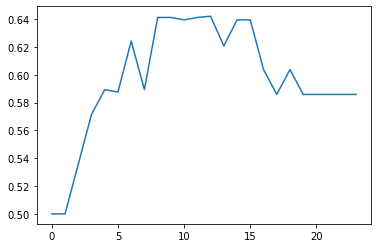

In [76]:
plt.plot(auc_rf)

Best auc for max_depth is 12

In [77]:
# Tuning n_estimators

auc_rf = []

for estimator in [50,100,300,500,700,1000]:
    
    rf_model = RandomForestClassifier(max_depth=12,random_state = 0,max_features='auto',n_estimators=estimator)
    rf_model.fit(X_train,y_train)
    
    y_pred_rf = rf_model.predict(X_test)
    auc_rf.append(metrics.roc_auc_score(y_test, y_pred_rf))
    
    
pd.DataFrame({'auc_rf':auc_rf},index=[50,100,300,500,700,1000])


,auc_rf
50,0.639385
100,0.641121
300,0.641989
500,0.641989
700,0.642857
1000,0.606275


n_estimators is chosen to be 700

In [78]:
rf_model = RandomForestClassifier(max_depth=12,random_state = 0,max_features='auto',n_estimators=700)

In [79]:
kf = KFold(n_splits=10)

k_fold_auc_score = []

# Iterate through each fold and calculate the RMSE for each fold
for train_index, test_index in kf.split(X):
    
    # Extract the training and test data
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit model
    rf_model = rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    
    #Calculate Accuracy for the fold and append it
    auc_rf = metrics.roc_auc_score(y_test, y_pred)
    k_fold_auc_score.append(auc_rf)
    
print('The AUC for each fold is:', k_fold_auc_score)
print('The average AUC is:', statistics.mean(k_fold_auc_score))

The AUC for each fold is: [0.7, 0.6428571428571428, 0.6562499999999999, 0.5687547746371275, 0.5349282296650717, 0.5666666666666667, 0.6402798232695139, 0.6198186528497409, 0.5883445945945946, 0.6363636363636364]
The average AUC is: 0.6154263520903495


### Model - XGBoost

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### Hyperparameter tuning

In [81]:
from xgboost import XGBClassifier

In [82]:
# tuning learning_rate

auc_xgb = []

for learning in [0.01,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65]:
    
    xgb_model = XGBClassifier(random_state=0,eval_metric='auc',use_label_encoder=False,learning_rate=learning)
    xgb_model.fit(X_train,y_train)
    
    y_pred_xgb = xgb_model.predict(X_test)
    auc_xgb.append(metrics.roc_auc_score(y_test, y_pred_xgb))

    
pd.DataFrame({'auc_xgb':auc_xgb},index=[0.01,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65])


,auc_xgb
0.01,0.656374
0.05,0.622396
0.10,0.692956
0.15,0.639385
0.20,0.658110
0.25,0.657242
0.30,0.657242
0.35,0.656374
0.40,0.621528
0.45,0.640253


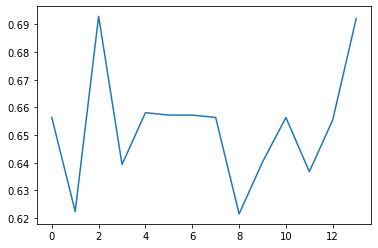

In [83]:
plt.plot(auc_xgb)

Best AUC for learning_rate is 0.10

In [84]:
# tuning max_depth


auc_xgb = []


for depth in range(2,16):
    
    xgb_model = XGBClassifier(random_state=0,eval_metric='auc',use_label_encoder=False,learning_rate=0.1,
                              max_depth=depth)
    xgb_model.fit(X_train,y_train)
    
    y_pred_xgb = xgb_model.predict(X_test)
    auc_xgb.append(metrics.roc_auc_score(y_test, y_pred_xgb))

    
pd.DataFrame({'auc_xgb':auc_xgb},index=range(2,16))


,auc_xgb
2,0.604539
3,0.675967
4,0.658978
5,0.655506
6,0.692956
7,0.709945
8,0.674231
9,0.675967
10,0.711682
11,0.694692


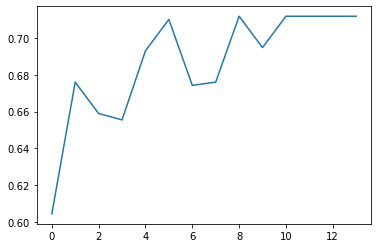

In [85]:
plt.plot(auc_xgb)

Best AUC for max_depth is 10

In [86]:
xgb_model = XGBClassifier(random_state=0,
                          eval_metric='auc',
                          use_label_encoder=False,
                          learning_rate=0.1,
                          max_depth=10,
                          )

In [87]:
kf_xgb = KFold(n_splits=10)

k_fold_auc_score_xgb = []

# Iterate through each fold and calculate the AUC for each fold
for train_index, test_index in kf_xgb.split(X):
    
    # Extract the training and test data
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit model
    xgb_model = xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict(X_test)
    
    #Calculate Accuracy for the fold and append it
    auc_xgb = metrics.roc_auc_score(y_test, y_pred)
    k_fold_auc_score_xgb.append(auc_xgb)
    
print('The AUC for each fold is:', k_fold_auc_score_xgb)
print('The average AUC is:', statistics.mean(k_fold_auc_score_xgb))

The AUC for each fold is: [0.8, 0.6402930402930402, 0.6006944444444444, 0.6375095492742551, 0.5830143540669857, 0.6333333333333333, 0.5714285714285714, 0.6823186528497409, 0.6508445945945945, 0.676555023923445]
The average AUC is: 0.6475991564208411


### Model - Catboost

In [88]:
from catboost import CatBoostClassifier
cb_model = CatBoostClassifier(random_seed=0,eval_metric='AUC:hints=skip_train~false')

In [89]:
cb_model.fit(X_train, y_train)
y_pred_cb = cb_model.predict(X_test)

Learning rate set to 0.013276
0:	learn: 0.8333555	total: 64.3ms	remaining: 1m 4s
1:	learn: 0.8780509	total: 67.8ms	remaining: 33.8s
2:	learn: 0.8938937	total: 71.5ms	remaining: 23.7s
3:	learn: 0.8939411	total: 75ms	remaining: 18.7s
4:	learn: 0.8938241	total: 78.7ms	remaining: 15.7s
5:	learn: 0.9053071	total: 82.7ms	remaining: 13.7s
6:	learn: 0.9068373	total: 86.7ms	remaining: 12.3s
7:	learn: 0.9095215	total: 91.3ms	remaining: 11.3s
8:	learn: 0.9034164	total: 95.1ms	remaining: 10.5s
9:	learn: 0.9045672	total: 100ms	remaining: 9.94s
10:	learn: 0.9020000	total: 104ms	remaining: 9.34s
11:	learn: 0.8998659	total: 108ms	remaining: 8.88s
12:	learn: 0.9023636	total: 111ms	remaining: 8.46s
13:	learn: 0.9043238	total: 115ms	remaining: 8.12s
14:	learn: 0.9052849	total: 119ms	remaining: 7.81s
15:	learn: 0.9083169	total: 122ms	remaining: 7.53s
16:	learn: 0.9075486	total: 126ms	remaining: 7.29s
17:	learn: 0.9078268	total: 129ms	remaining: 7.06s
18:	learn: 0.9092243	total: 133ms	remaining: 6.84s
19:	

190:	learn: 0.9635689	total: 710ms	remaining: 3.01s
191:	learn: 0.9636195	total: 714ms	remaining: 3s
192:	learn: 0.9636638	total: 717ms	remaining: 3s
193:	learn: 0.9639325	total: 721ms	remaining: 3s
194:	learn: 0.9640527	total: 725ms	remaining: 2.99s
195:	learn: 0.9643878	total: 728ms	remaining: 2.99s
196:	learn: 0.9643182	total: 732ms	remaining: 2.98s
197:	learn: 0.9643751	total: 735ms	remaining: 2.98s
198:	learn: 0.9644004	total: 739ms	remaining: 2.97s
199:	learn: 0.9644068	total: 742ms	remaining: 2.97s
200:	learn: 0.9644763	total: 746ms	remaining: 2.96s
201:	learn: 0.9644257	total: 749ms	remaining: 2.96s
202:	learn: 0.9645585	total: 753ms	remaining: 2.96s
203:	learn: 0.9645522	total: 757ms	remaining: 2.95s
204:	learn: 0.9645838	total: 760ms	remaining: 2.95s
205:	learn: 0.9646976	total: 764ms	remaining: 2.94s
206:	learn: 0.9647292	total: 768ms	remaining: 2.94s
207:	learn: 0.9647292	total: 771ms	remaining: 2.94s
208:	learn: 0.9647356	total: 775ms	remaining: 2.93s
209:	learn: 0.9648241

362:	learn: 0.9722096	total: 1.3s	remaining: 2.27s
363:	learn: 0.9722475	total: 1.3s	remaining: 2.27s
364:	learn: 0.9723740	total: 1.3s	remaining: 2.27s
365:	learn: 0.9723550	total: 1.3s	remaining: 2.26s
366:	learn: 0.9723550	total: 1.31s	remaining: 2.26s
367:	learn: 0.9724056	total: 1.31s	remaining: 2.25s
368:	learn: 0.9725257	total: 1.31s	remaining: 2.25s
369:	learn: 0.9725068	total: 1.32s	remaining: 2.25s
370:	learn: 0.9726522	total: 1.32s	remaining: 2.24s
371:	learn: 0.9727154	total: 1.32s	remaining: 2.24s
372:	learn: 0.9727281	total: 1.33s	remaining: 2.23s
373:	learn: 0.9727407	total: 1.33s	remaining: 2.23s
374:	learn: 0.9727534	total: 1.34s	remaining: 2.23s
375:	learn: 0.9727534	total: 1.34s	remaining: 2.22s
376:	learn: 0.9727597	total: 1.34s	remaining: 2.22s
377:	learn: 0.9728482	total: 1.35s	remaining: 2.21s
378:	learn: 0.9728609	total: 1.35s	remaining: 2.21s
379:	learn: 0.9728672	total: 1.35s	remaining: 2.21s
380:	learn: 0.9729620	total: 1.36s	remaining: 2.2s
381:	learn: 0.972

537:	learn: 0.9761963	total: 1.88s	remaining: 1.61s
538:	learn: 0.9762027	total: 1.88s	remaining: 1.61s
539:	learn: 0.9763924	total: 1.88s	remaining: 1.6s
540:	learn: 0.9763734	total: 1.89s	remaining: 1.6s
541:	learn: 0.9763734	total: 1.89s	remaining: 1.6s
542:	learn: 0.9764556	total: 1.89s	remaining: 1.59s
543:	learn: 0.9769109	total: 1.9s	remaining: 1.59s
544:	learn: 0.9768982	total: 1.9s	remaining: 1.59s
545:	learn: 0.9768856	total: 1.9s	remaining: 1.58s
546:	learn: 0.9769109	total: 1.91s	remaining: 1.58s
547:	learn: 0.9769362	total: 1.91s	remaining: 1.58s
548:	learn: 0.9769678	total: 1.91s	remaining: 1.57s
549:	learn: 0.9769804	total: 1.92s	remaining: 1.57s
550:	learn: 0.9771259	total: 1.92s	remaining: 1.56s
551:	learn: 0.9772081	total: 1.92s	remaining: 1.56s
552:	learn: 0.9772144	total: 1.93s	remaining: 1.56s
553:	learn: 0.9772270	total: 1.93s	remaining: 1.55s
554:	learn: 0.9772270	total: 1.94s	remaining: 1.55s
555:	learn: 0.9772776	total: 1.94s	remaining: 1.55s
556:	learn: 0.9776

705:	learn: 0.9805024	total: 2.46s	remaining: 1.02s
706:	learn: 0.9805024	total: 2.46s	remaining: 1.02s
707:	learn: 0.9805088	total: 2.46s	remaining: 1.02s
708:	learn: 0.9805277	total: 2.47s	remaining: 1.01s
709:	learn: 0.9804898	total: 2.47s	remaining: 1.01s
710:	learn: 0.9805151	total: 2.48s	remaining: 1.01s
711:	learn: 0.9807174	total: 2.48s	remaining: 1s
712:	learn: 0.9807238	total: 2.48s	remaining: 999ms
713:	learn: 0.9807238	total: 2.48s	remaining: 995ms
714:	learn: 0.9807427	total: 2.49s	remaining: 992ms
715:	learn: 0.9807427	total: 2.49s	remaining: 988ms
716:	learn: 0.9807490	total: 2.5s	remaining: 985ms
717:	learn: 0.9807807	total: 2.5s	remaining: 982ms
718:	learn: 0.9808186	total: 2.5s	remaining: 978ms
719:	learn: 0.9808123	total: 2.51s	remaining: 975ms
720:	learn: 0.9808249	total: 2.51s	remaining: 971ms
721:	learn: 0.9808249	total: 2.51s	remaining: 968ms
722:	learn: 0.9808629	total: 2.52s	remaining: 964ms
723:	learn: 0.9808629	total: 2.52s	remaining: 961ms
724:	learn: 0.9809

875:	learn: 0.9879290	total: 3.04s	remaining: 430ms
876:	learn: 0.9879733	total: 3.04s	remaining: 427ms
877:	learn: 0.9879986	total: 3.05s	remaining: 423ms
878:	learn: 0.9880112	total: 3.05s	remaining: 420ms
879:	learn: 0.9880871	total: 3.05s	remaining: 416ms
880:	learn: 0.9881314	total: 3.06s	remaining: 413ms
881:	learn: 0.9881187	total: 3.06s	remaining: 409ms
882:	learn: 0.9881314	total: 3.06s	remaining: 406ms
883:	learn: 0.9881756	total: 3.07s	remaining: 403ms
884:	learn: 0.9883274	total: 3.07s	remaining: 399ms
885:	learn: 0.9883780	total: 3.07s	remaining: 396ms
886:	learn: 0.9883717	total: 3.08s	remaining: 392ms
887:	learn: 0.9884349	total: 3.08s	remaining: 389ms
888:	learn: 0.9885613	total: 3.08s	remaining: 385ms
889:	learn: 0.9886119	total: 3.09s	remaining: 382ms
890:	learn: 0.9886309	total: 3.09s	remaining: 378ms
891:	learn: 0.9886941	total: 3.09s	remaining: 375ms
892:	learn: 0.9887005	total: 3.1s	remaining: 371ms
893:	learn: 0.9887258	total: 3.1s	remaining: 368ms
894:	learn: 0.

In [90]:
kf_cb = KFold(n_splits=10)

k_fold_auc_score_cb = []

# Iterate through each fold and calculate the AUC for each fold
for train_index, test_index in kf_cb.split(X):
    
    # Extract the training and test data
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit model
    cb_model = cb_model.fit(X_train, y_train)
    y_pred = cb_model.predict(X_test)
    
    #Calculate Accuracy for the fold and append it
    auc_cb = metrics.roc_auc_score(y_test, y_pred)
    k_fold_auc_score_cb.append(auc_cb)
    
print('The AUC for each fold is:', k_fold_auc_score_cb)
print('The average AUC is:', statistics.mean(k_fold_auc_score_cb))

Learning rate set to 0.013273
0:	learn: 0.8690546	total: 3.75ms	remaining: 3.75s
1:	learn: 0.8873051	total: 8.39ms	remaining: 4.19s
2:	learn: 0.9040268	total: 13.7ms	remaining: 4.54s
3:	learn: 0.9000036	total: 17.5ms	remaining: 4.36s
4:	learn: 0.8995566	total: 21.6ms	remaining: 4.29s
5:	learn: 0.9077192	total: 24.9ms	remaining: 4.12s
6:	learn: 0.9100110	total: 28.2ms	remaining: 4.01s
7:	learn: 0.9123653	total: 31.5ms	remaining: 3.9s
8:	learn: 0.9041311	total: 35.1ms	remaining: 3.86s
9:	learn: 0.9032102	total: 38.4ms	remaining: 3.8s
10:	learn: 0.9038152	total: 41.7ms	remaining: 3.75s
11:	learn: 0.9075851	total: 45.1ms	remaining: 3.71s
12:	learn: 0.9068192	total: 48.3ms	remaining: 3.67s
13:	learn: 0.9080590	total: 51.7ms	remaining: 3.64s
14:	learn: 0.9098709	total: 55ms	remaining: 3.61s
15:	learn: 0.9107411	total: 58.2ms	remaining: 3.58s
16:	learn: 0.9109438	total: 61.5ms	remaining: 3.56s
17:	learn: 0.9109140	total: 64.9ms	remaining: 3.54s
18:	learn: 0.9114534	total: 68.9ms	remaining: 3.

169:	learn: 0.9653943	total: 583ms	remaining: 2.85s
170:	learn: 0.9655135	total: 587ms	remaining: 2.84s
171:	learn: 0.9655493	total: 590ms	remaining: 2.84s
172:	learn: 0.9656268	total: 594ms	remaining: 2.84s
173:	learn: 0.9656566	total: 598ms	remaining: 2.84s
174:	learn: 0.9657222	total: 603ms	remaining: 2.84s
175:	learn: 0.9657341	total: 606ms	remaining: 2.84s
176:	learn: 0.9657460	total: 610ms	remaining: 2.84s
177:	learn: 0.9657043	total: 613ms	remaining: 2.83s
178:	learn: 0.9657758	total: 617ms	remaining: 2.83s
179:	learn: 0.9658890	total: 620ms	remaining: 2.82s
180:	learn: 0.9658890	total: 624ms	remaining: 2.82s
181:	learn: 0.9659725	total: 627ms	remaining: 2.82s
182:	learn: 0.9660261	total: 630ms	remaining: 2.81s
183:	learn: 0.9660798	total: 633ms	remaining: 2.81s
184:	learn: 0.9663599	total: 637ms	remaining: 2.8s
185:	learn: 0.9663480	total: 640ms	remaining: 2.8s
186:	learn: 0.9663778	total: 643ms	remaining: 2.79s
187:	learn: 0.9664314	total: 646ms	remaining: 2.79s
188:	learn: 0.

334:	learn: 0.9743765	total: 1.16s	remaining: 2.31s
335:	learn: 0.9743944	total: 1.17s	remaining: 2.31s
336:	learn: 0.9744004	total: 1.17s	remaining: 2.3s
337:	learn: 0.9744064	total: 1.17s	remaining: 2.3s
338:	learn: 0.9745315	total: 1.18s	remaining: 2.3s
339:	learn: 0.9745434	total: 1.18s	remaining: 2.29s
340:	learn: 0.9745732	total: 1.19s	remaining: 2.29s
341:	learn: 0.9745554	total: 1.19s	remaining: 2.29s
342:	learn: 0.9745613	total: 1.19s	remaining: 2.29s
343:	learn: 0.9746209	total: 1.2s	remaining: 2.28s
344:	learn: 0.9746865	total: 1.2s	remaining: 2.28s
345:	learn: 0.9746865	total: 1.2s	remaining: 2.27s
346:	learn: 0.9746865	total: 1.21s	remaining: 2.27s
347:	learn: 0.9748057	total: 1.21s	remaining: 2.27s
348:	learn: 0.9748117	total: 1.21s	remaining: 2.26s
349:	learn: 0.9748534	total: 1.22s	remaining: 2.26s
350:	learn: 0.9749487	total: 1.22s	remaining: 2.26s
351:	learn: 0.9750143	total: 1.22s	remaining: 2.25s
352:	learn: 0.9750560	total: 1.23s	remaining: 2.25s
353:	learn: 0.9750

525:	learn: 0.9803160	total: 1.85s	remaining: 1.67s
526:	learn: 0.9803160	total: 1.86s	remaining: 1.67s
527:	learn: 0.9803279	total: 1.86s	remaining: 1.66s
528:	learn: 0.9803458	total: 1.86s	remaining: 1.66s
529:	learn: 0.9803637	total: 1.87s	remaining: 1.66s
530:	learn: 0.9803995	total: 1.87s	remaining: 1.65s
531:	learn: 0.9804829	total: 1.87s	remaining: 1.65s
532:	learn: 0.9804889	total: 1.88s	remaining: 1.64s
533:	learn: 0.9804948	total: 1.88s	remaining: 1.64s
534:	learn: 0.9805008	total: 1.88s	remaining: 1.64s
535:	learn: 0.9805067	total: 1.89s	remaining: 1.63s
536:	learn: 0.9805485	total: 1.89s	remaining: 1.63s
537:	learn: 0.9805723	total: 1.89s	remaining: 1.63s
538:	learn: 0.9806081	total: 1.9s	remaining: 1.62s
539:	learn: 0.9806200	total: 1.9s	remaining: 1.62s
540:	learn: 0.9806438	total: 1.91s	remaining: 1.62s
541:	learn: 0.9806438	total: 1.91s	remaining: 1.61s
542:	learn: 0.9806498	total: 1.91s	remaining: 1.61s
543:	learn: 0.9806498	total: 1.91s	remaining: 1.6s
544:	learn: 0.9

694:	learn: 0.9838207	total: 2.44s	remaining: 1.07s
695:	learn: 0.9838386	total: 2.44s	remaining: 1.07s
696:	learn: 0.9838624	total: 2.44s	remaining: 1.06s
697:	learn: 0.9838803	total: 2.45s	remaining: 1.06s
698:	learn: 0.9839101	total: 2.45s	remaining: 1.05s
699:	learn: 0.9839459	total: 2.46s	remaining: 1.05s
700:	learn: 0.9839518	total: 2.46s	remaining: 1.05s
701:	learn: 0.9839578	total: 2.46s	remaining: 1.04s
702:	learn: 0.9839578	total: 2.46s	remaining: 1.04s
703:	learn: 0.9839697	total: 2.47s	remaining: 1.04s
704:	learn: 0.9839876	total: 2.47s	remaining: 1.03s
705:	learn: 0.9840114	total: 2.48s	remaining: 1.03s
706:	learn: 0.9840174	total: 2.48s	remaining: 1.03s
707:	learn: 0.9840353	total: 2.48s	remaining: 1.02s
708:	learn: 0.9840472	total: 2.48s	remaining: 1.02s
709:	learn: 0.9840472	total: 2.49s	remaining: 1.02s
710:	learn: 0.9840472	total: 2.49s	remaining: 1.01s
711:	learn: 0.9840472	total: 2.5s	remaining: 1.01s
712:	learn: 0.9840472	total: 2.5s	remaining: 1s
713:	learn: 0.984

865:	learn: 0.9880257	total: 3.02s	remaining: 468ms
866:	learn: 0.9880257	total: 3.03s	remaining: 464ms
867:	learn: 0.9881211	total: 3.03s	remaining: 461ms
868:	learn: 0.9881211	total: 3.03s	remaining: 457ms
869:	learn: 0.9881509	total: 3.04s	remaining: 454ms
870:	learn: 0.9881628	total: 3.04s	remaining: 451ms
871:	learn: 0.9881687	total: 3.04s	remaining: 447ms
872:	learn: 0.9881807	total: 3.05s	remaining: 444ms
873:	learn: 0.9881986	total: 3.05s	remaining: 440ms
874:	learn: 0.9881986	total: 3.06s	remaining: 437ms
875:	learn: 0.9882105	total: 3.06s	remaining: 433ms
876:	learn: 0.9883297	total: 3.06s	remaining: 430ms
877:	learn: 0.9883595	total: 3.07s	remaining: 426ms
878:	learn: 0.9883774	total: 3.07s	remaining: 423ms
879:	learn: 0.9883833	total: 3.07s	remaining: 419ms
880:	learn: 0.9885085	total: 3.08s	remaining: 416ms
881:	learn: 0.9886515	total: 3.08s	remaining: 412ms
882:	learn: 0.9886575	total: 3.08s	remaining: 409ms
883:	learn: 0.9886873	total: 3.09s	remaining: 405ms
884:	learn: 

28:	learn: 0.9313679	total: 97ms	remaining: 3.25s
29:	learn: 0.9313861	total: 101ms	remaining: 3.26s
30:	learn: 0.9311491	total: 104ms	remaining: 3.25s
31:	learn: 0.9325348	total: 108ms	remaining: 3.26s
32:	learn: 0.9334342	total: 111ms	remaining: 3.26s
33:	learn: 0.9334950	total: 115ms	remaining: 3.26s
34:	learn: 0.9339690	total: 118ms	remaining: 3.26s
35:	learn: 0.9340268	total: 122ms	remaining: 3.26s
36:	learn: 0.9339599	total: 126ms	remaining: 3.27s
37:	learn: 0.9349870	total: 129ms	remaining: 3.27s
38:	learn: 0.9351906	total: 133ms	remaining: 3.27s
39:	learn: 0.9363392	total: 136ms	remaining: 3.26s
40:	learn: 0.9366674	total: 139ms	remaining: 3.26s
41:	learn: 0.9384298	total: 143ms	remaining: 3.25s
42:	learn: 0.9384359	total: 146ms	remaining: 3.25s
43:	learn: 0.9386182	total: 149ms	remaining: 3.24s
44:	learn: 0.9388553	total: 152ms	remaining: 3.23s
45:	learn: 0.9399370	total: 156ms	remaining: 3.23s
46:	learn: 0.9406785	total: 159ms	remaining: 3.23s
47:	learn: 0.9418332	total: 163m

195:	learn: 0.9653862	total: 678ms	remaining: 2.78s
196:	learn: 0.9662491	total: 681ms	remaining: 2.78s
197:	learn: 0.9660000	total: 684ms	remaining: 2.77s
198:	learn: 0.9660425	total: 688ms	remaining: 2.77s
199:	learn: 0.9661276	total: 691ms	remaining: 2.77s
200:	learn: 0.9663525	total: 695ms	remaining: 2.76s
201:	learn: 0.9664315	total: 698ms	remaining: 2.76s
202:	learn: 0.9664072	total: 702ms	remaining: 2.75s
203:	learn: 0.9665409	total: 705ms	remaining: 2.75s
204:	learn: 0.9665469	total: 708ms	remaining: 2.75s
205:	learn: 0.9668204	total: 712ms	remaining: 2.74s
206:	learn: 0.9669177	total: 715ms	remaining: 2.74s
207:	learn: 0.9668994	total: 719ms	remaining: 2.74s
208:	learn: 0.9667110	total: 722ms	remaining: 2.73s
209:	learn: 0.9667050	total: 726ms	remaining: 2.73s
210:	learn: 0.9668265	total: 729ms	remaining: 2.73s
211:	learn: 0.9670939	total: 732ms	remaining: 2.72s
212:	learn: 0.9671304	total: 735ms	remaining: 2.72s
213:	learn: 0.9671668	total: 739ms	remaining: 2.71s
214:	learn: 

360:	learn: 0.9743199	total: 1.26s	remaining: 2.23s
361:	learn: 0.9743564	total: 1.26s	remaining: 2.22s
362:	learn: 0.9743564	total: 1.26s	remaining: 2.22s
363:	learn: 0.9744293	total: 1.27s	remaining: 2.22s
364:	learn: 0.9744597	total: 1.27s	remaining: 2.21s
365:	learn: 0.9744780	total: 1.28s	remaining: 2.21s
366:	learn: 0.9744840	total: 1.28s	remaining: 2.21s
367:	learn: 0.9744962	total: 1.28s	remaining: 2.21s
368:	learn: 0.9744840	total: 1.29s	remaining: 2.21s
369:	learn: 0.9745570	total: 1.29s	remaining: 2.2s
370:	learn: 0.9747818	total: 1.3s	remaining: 2.2s
371:	learn: 0.9748001	total: 1.3s	remaining: 2.2s
372:	learn: 0.9748426	total: 1.3s	remaining: 2.19s
373:	learn: 0.9748365	total: 1.31s	remaining: 2.19s
374:	learn: 0.9748426	total: 1.31s	remaining: 2.19s
375:	learn: 0.9748487	total: 1.31s	remaining: 2.18s
376:	learn: 0.9748608	total: 1.32s	remaining: 2.18s
377:	learn: 0.9748791	total: 1.32s	remaining: 2.17s
378:	learn: 0.9748973	total: 1.32s	remaining: 2.17s
379:	learn: 0.9749

526:	learn: 0.9782156	total: 1.84s	remaining: 1.65s
527:	learn: 0.9782156	total: 1.84s	remaining: 1.65s
528:	learn: 0.9782156	total: 1.85s	remaining: 1.64s
529:	learn: 0.9782156	total: 1.85s	remaining: 1.64s
530:	learn: 0.9782034	total: 1.85s	remaining: 1.64s
531:	learn: 0.9783796	total: 1.86s	remaining: 1.63s
532:	learn: 0.9783857	total: 1.86s	remaining: 1.63s
533:	learn: 0.9783796	total: 1.86s	remaining: 1.63s
534:	learn: 0.9784100	total: 1.87s	remaining: 1.62s
535:	learn: 0.9785741	total: 1.87s	remaining: 1.62s
536:	learn: 0.9785802	total: 1.87s	remaining: 1.62s
537:	learn: 0.9785863	total: 1.88s	remaining: 1.61s
538:	learn: 0.9785863	total: 1.88s	remaining: 1.61s
539:	learn: 0.9785863	total: 1.88s	remaining: 1.6s
540:	learn: 0.9786531	total: 1.89s	remaining: 1.6s
541:	learn: 0.9786592	total: 1.89s	remaining: 1.6s
542:	learn: 0.9786653	total: 1.89s	remaining: 1.59s
543:	learn: 0.9786653	total: 1.9s	remaining: 1.59s
544:	learn: 0.9788476	total: 1.9s	remaining: 1.59s
545:	learn: 0.978

695:	learn: 0.9830319	total: 2.42s	remaining: 1.06s
696:	learn: 0.9830440	total: 2.43s	remaining: 1.05s
697:	learn: 0.9830744	total: 2.43s	remaining: 1.05s
698:	learn: 0.9831534	total: 2.43s	remaining: 1.05s
699:	learn: 0.9831717	total: 2.44s	remaining: 1.04s
700:	learn: 0.9831352	total: 2.44s	remaining: 1.04s
701:	learn: 0.9831656	total: 2.44s	remaining: 1.04s
702:	learn: 0.9831778	total: 2.45s	remaining: 1.03s
703:	learn: 0.9831899	total: 2.45s	remaining: 1.03s
704:	learn: 0.9830319	total: 2.45s	remaining: 1.03s
705:	learn: 0.9830319	total: 2.46s	remaining: 1.02s
706:	learn: 0.9830319	total: 2.46s	remaining: 1.02s
707:	learn: 0.9830380	total: 2.46s	remaining: 1.01s
708:	learn: 0.9830440	total: 2.47s	remaining: 1.01s
709:	learn: 0.9830501	total: 2.47s	remaining: 1.01s
710:	learn: 0.9830562	total: 2.47s	remaining: 1s
711:	learn: 0.9830623	total: 2.48s	remaining: 1s
712:	learn: 0.9830866	total: 2.48s	remaining: 998ms
713:	learn: 0.9831231	total: 2.48s	remaining: 995ms
714:	learn: 0.9831

863:	learn: 0.9888814	total: 3s	remaining: 473ms
864:	learn: 0.9888632	total: 3.01s	remaining: 469ms
865:	learn: 0.9889361	total: 3.01s	remaining: 466ms
866:	learn: 0.9889726	total: 3.01s	remaining: 462ms
867:	learn: 0.9889786	total: 3.02s	remaining: 459ms
868:	learn: 0.9889786	total: 3.02s	remaining: 455ms
869:	learn: 0.9890273	total: 3.02s	remaining: 452ms
870:	learn: 0.9890455	total: 3.03s	remaining: 448ms
871:	learn: 0.9890637	total: 3.03s	remaining: 445ms
872:	learn: 0.9890759	total: 3.03s	remaining: 441ms
873:	learn: 0.9890880	total: 3.04s	remaining: 438ms
874:	learn: 0.9891245	total: 3.04s	remaining: 434ms
875:	learn: 0.9891549	total: 3.04s	remaining: 431ms
876:	learn: 0.9891670	total: 3.05s	remaining: 428ms
877:	learn: 0.9892217	total: 3.05s	remaining: 424ms
878:	learn: 0.9893433	total: 3.06s	remaining: 421ms
879:	learn: 0.9894466	total: 3.06s	remaining: 417ms
880:	learn: 0.9894527	total: 3.06s	remaining: 414ms
881:	learn: 0.9895195	total: 3.07s	remaining: 410ms
882:	learn: 0.9

23:	learn: 0.9207456	total: 84.1ms	remaining: 3.42s
24:	learn: 0.9217462	total: 87.6ms	remaining: 3.41s
25:	learn: 0.9218640	total: 90.9ms	remaining: 3.4s
26:	learn: 0.9216533	total: 94.3ms	remaining: 3.4s
27:	learn: 0.9230412	total: 97.6ms	remaining: 3.39s
28:	learn: 0.9248999	total: 101ms	remaining: 3.38s
29:	learn: 0.9246149	total: 104ms	remaining: 3.37s
30:	learn: 0.9250796	total: 108ms	remaining: 3.37s
31:	learn: 0.9258851	total: 111ms	remaining: 3.36s
32:	learn: 0.9272977	total: 114ms	remaining: 3.35s
33:	learn: 0.9275889	total: 118ms	remaining: 3.35s
34:	learn: 0.9283448	total: 121ms	remaining: 3.34s
35:	learn: 0.9292618	total: 125ms	remaining: 3.34s
36:	learn: 0.9297265	total: 128ms	remaining: 3.33s
37:	learn: 0.9303957	total: 131ms	remaining: 3.33s
38:	learn: 0.9306311	total: 135ms	remaining: 3.32s
39:	learn: 0.9326324	total: 138ms	remaining: 3.31s
40:	learn: 0.9334626	total: 141ms	remaining: 3.31s
41:	learn: 0.9353895	total: 145ms	remaining: 3.3s
42:	learn: 0.9344416	total: 1

192:	learn: 0.9645442	total: 665ms	remaining: 2.78s
193:	learn: 0.9645504	total: 669ms	remaining: 2.78s
194:	learn: 0.9648540	total: 672ms	remaining: 2.77s
195:	learn: 0.9648726	total: 676ms	remaining: 2.77s
196:	learn: 0.9649283	total: 679ms	remaining: 2.77s
197:	learn: 0.9652443	total: 683ms	remaining: 2.77s
198:	learn: 0.9652567	total: 686ms	remaining: 2.76s
199:	learn: 0.9652877	total: 689ms	remaining: 2.76s
200:	learn: 0.9654054	total: 693ms	remaining: 2.75s
201:	learn: 0.9654797	total: 696ms	remaining: 2.75s
202:	learn: 0.9656842	total: 699ms	remaining: 2.75s
203:	learn: 0.9657276	total: 703ms	remaining: 2.74s
204:	learn: 0.9657833	total: 707ms	remaining: 2.74s
205:	learn: 0.9659011	total: 710ms	remaining: 2.74s
206:	learn: 0.9660002	total: 713ms	remaining: 2.73s
207:	learn: 0.9661055	total: 717ms	remaining: 2.73s
208:	learn: 0.9661365	total: 720ms	remaining: 2.73s
209:	learn: 0.9661241	total: 724ms	remaining: 2.72s
210:	learn: 0.9662480	total: 727ms	remaining: 2.72s
211:	learn: 

359:	learn: 0.9733361	total: 1.25s	remaining: 2.22s
360:	learn: 0.9733795	total: 1.25s	remaining: 2.21s
361:	learn: 0.9733919	total: 1.25s	remaining: 2.21s
362:	learn: 0.9734105	total: 1.26s	remaining: 2.21s
363:	learn: 0.9735592	total: 1.26s	remaining: 2.21s
364:	learn: 0.9735592	total: 1.26s	remaining: 2.2s
365:	learn: 0.9735406	total: 1.27s	remaining: 2.2s
366:	learn: 0.9736273	total: 1.27s	remaining: 2.19s
367:	learn: 0.9736955	total: 1.28s	remaining: 2.19s
368:	learn: 0.9737017	total: 1.28s	remaining: 2.19s
369:	learn: 0.9737326	total: 1.28s	remaining: 2.19s
370:	learn: 0.9737946	total: 1.29s	remaining: 2.18s
371:	learn: 0.9739123	total: 1.29s	remaining: 2.18s
372:	learn: 0.9738999	total: 1.29s	remaining: 2.17s
373:	learn: 0.9740672	total: 1.3s	remaining: 2.17s
374:	learn: 0.9740424	total: 1.3s	remaining: 2.17s
375:	learn: 0.9740920	total: 1.3s	remaining: 2.16s
376:	learn: 0.9743336	total: 1.31s	remaining: 2.16s
377:	learn: 0.9744699	total: 1.31s	remaining: 2.15s
378:	learn: 0.974

527:	learn: 0.9777290	total: 1.83s	remaining: 1.64s
528:	learn: 0.9777599	total: 1.83s	remaining: 1.63s
529:	learn: 0.9777723	total: 1.84s	remaining: 1.63s
530:	learn: 0.9777723	total: 1.84s	remaining: 1.63s
531:	learn: 0.9777723	total: 1.84s	remaining: 1.62s
532:	learn: 0.9778095	total: 1.85s	remaining: 1.62s
533:	learn: 0.9778467	total: 1.85s	remaining: 1.62s
534:	learn: 0.9778529	total: 1.85s	remaining: 1.61s
535:	learn: 0.9778529	total: 1.86s	remaining: 1.61s
536:	learn: 0.9778529	total: 1.86s	remaining: 1.61s
537:	learn: 0.9778839	total: 1.87s	remaining: 1.6s
538:	learn: 0.9778901	total: 1.87s	remaining: 1.6s
539:	learn: 0.9779582	total: 1.87s	remaining: 1.59s
540:	learn: 0.9779582	total: 1.88s	remaining: 1.59s
541:	learn: 0.9780326	total: 1.88s	remaining: 1.59s
542:	learn: 0.9780821	total: 1.88s	remaining: 1.58s
543:	learn: 0.9780945	total: 1.89s	remaining: 1.58s
544:	learn: 0.9780512	total: 1.89s	remaining: 1.58s
545:	learn: 0.9781007	total: 1.89s	remaining: 1.57s
546:	learn: 0.

695:	learn: 0.9850184	total: 2.42s	remaining: 1.05s
696:	learn: 0.9850370	total: 2.42s	remaining: 1.05s
697:	learn: 0.9850866	total: 2.42s	remaining: 1.05s
698:	learn: 0.9850928	total: 2.43s	remaining: 1.04s
699:	learn: 0.9852786	total: 2.43s	remaining: 1.04s
700:	learn: 0.9852972	total: 2.43s	remaining: 1.04s
701:	learn: 0.9854149	total: 2.44s	remaining: 1.03s
702:	learn: 0.9854211	total: 2.44s	remaining: 1.03s
703:	learn: 0.9854707	total: 2.44s	remaining: 1.03s
704:	learn: 0.9855698	total: 2.45s	remaining: 1.02s
705:	learn: 0.9855884	total: 2.45s	remaining: 1.02s
706:	learn: 0.9855946	total: 2.45s	remaining: 1.02s
707:	learn: 0.9856194	total: 2.46s	remaining: 1.01s
708:	learn: 0.9856566	total: 2.46s	remaining: 1.01s
709:	learn: 0.9856690	total: 2.46s	remaining: 1.01s
710:	learn: 0.9857185	total: 2.47s	remaining: 1s
711:	learn: 0.9857495	total: 2.47s	remaining: 1000ms
712:	learn: 0.9857619	total: 2.47s	remaining: 996ms
713:	learn: 0.9857557	total: 2.48s	remaining: 993ms
714:	learn: 0.

863:	learn: 0.9922149	total: 3s	remaining: 472ms
864:	learn: 0.9922397	total: 3s	remaining: 469ms
865:	learn: 0.9922583	total: 3.01s	remaining: 465ms
866:	learn: 0.9922769	total: 3.01s	remaining: 462ms
867:	learn: 0.9923574	total: 3.01s	remaining: 458ms
868:	learn: 0.9923822	total: 3.02s	remaining: 455ms
869:	learn: 0.9923822	total: 3.02s	remaining: 451ms
870:	learn: 0.9924813	total: 3.02s	remaining: 448ms
871:	learn: 0.9924565	total: 3.02s	remaining: 444ms
872:	learn: 0.9925061	total: 3.03s	remaining: 441ms
873:	learn: 0.9925371	total: 3.03s	remaining: 437ms
874:	learn: 0.9925743	total: 3.04s	remaining: 434ms
875:	learn: 0.9925805	total: 3.04s	remaining: 430ms
876:	learn: 0.9926238	total: 3.04s	remaining: 427ms
877:	learn: 0.9926858	total: 3.05s	remaining: 423ms
878:	learn: 0.9927168	total: 3.05s	remaining: 420ms
879:	learn: 0.9928097	total: 3.05s	remaining: 416ms
880:	learn: 0.9928283	total: 3.06s	remaining: 413ms
881:	learn: 0.9928655	total: 3.06s	remaining: 409ms
882:	learn: 0.9929

31:	learn: 0.9190874	total: 112ms	remaining: 3.39s
32:	learn: 0.9202097	total: 117ms	remaining: 3.42s
33:	learn: 0.9201640	total: 120ms	remaining: 3.42s
34:	learn: 0.9211036	total: 124ms	remaining: 3.41s
35:	learn: 0.9215669	total: 128ms	remaining: 3.41s
36:	learn: 0.9217626	total: 131ms	remaining: 3.42s
37:	learn: 0.9224673	total: 135ms	remaining: 3.42s
38:	learn: 0.9225717	total: 138ms	remaining: 3.41s
39:	learn: 0.9233156	total: 142ms	remaining: 3.4s
40:	learn: 0.9243857	total: 145ms	remaining: 3.4s
41:	learn: 0.9267803	total: 149ms	remaining: 3.4s
42:	learn: 0.9274198	total: 152ms	remaining: 3.39s
43:	learn: 0.9291619	total: 155ms	remaining: 3.38s
44:	learn: 0.9286465	total: 159ms	remaining: 3.37s
45:	learn: 0.9287509	total: 162ms	remaining: 3.37s
46:	learn: 0.9286530	total: 166ms	remaining: 3.36s
47:	learn: 0.9285682	total: 169ms	remaining: 3.35s
48:	learn: 0.9284899	total: 172ms	remaining: 3.35s
49:	learn: 0.9292468	total: 176ms	remaining: 3.34s
50:	learn: 0.9289988	total: 179ms	

199:	learn: 0.9595290	total: 693ms	remaining: 2.77s
200:	learn: 0.9597313	total: 696ms	remaining: 2.77s
201:	learn: 0.9597444	total: 700ms	remaining: 2.76s
202:	learn: 0.9598488	total: 703ms	remaining: 2.76s
203:	learn: 0.9600054	total: 707ms	remaining: 2.76s
204:	learn: 0.9600054	total: 711ms	remaining: 2.76s
205:	learn: 0.9601163	total: 715ms	remaining: 2.76s
206:	learn: 0.9601880	total: 719ms	remaining: 2.75s
207:	learn: 0.9604556	total: 722ms	remaining: 2.75s
208:	learn: 0.9604947	total: 725ms	remaining: 2.74s
209:	learn: 0.9605795	total: 728ms	remaining: 2.74s
210:	learn: 0.9606774	total: 731ms	remaining: 2.73s
211:	learn: 0.9608471	total: 735ms	remaining: 2.73s
212:	learn: 0.9608601	total: 738ms	remaining: 2.73s
213:	learn: 0.9608927	total: 741ms	remaining: 2.72s
214:	learn: 0.9609841	total: 745ms	remaining: 2.72s
215:	learn: 0.9612320	total: 749ms	remaining: 2.72s
216:	learn: 0.9612516	total: 752ms	remaining: 2.71s
217:	learn: 0.9613430	total: 755ms	remaining: 2.71s
218:	learn: 

366:	learn: 0.9701908	total: 1.27s	remaining: 2.2s
367:	learn: 0.9702365	total: 1.28s	remaining: 2.2s
368:	learn: 0.9702952	total: 1.28s	remaining: 2.19s
369:	learn: 0.9703474	total: 1.29s	remaining: 2.19s
370:	learn: 0.9703539	total: 1.29s	remaining: 2.19s
371:	learn: 0.9703865	total: 1.29s	remaining: 2.18s
372:	learn: 0.9703865	total: 1.3s	remaining: 2.18s
373:	learn: 0.9704257	total: 1.3s	remaining: 2.18s
374:	learn: 0.9704257	total: 1.3s	remaining: 2.17s
375:	learn: 0.9706214	total: 1.31s	remaining: 2.17s
376:	learn: 0.9706802	total: 1.31s	remaining: 2.17s
377:	learn: 0.9706802	total: 1.31s	remaining: 2.16s
378:	learn: 0.9707128	total: 1.32s	remaining: 2.16s
379:	learn: 0.9707258	total: 1.32s	remaining: 2.16s
380:	learn: 0.9716491	total: 1.32s	remaining: 2.15s
381:	learn: 0.9716491	total: 1.33s	remaining: 2.15s
382:	learn: 0.9716752	total: 1.33s	remaining: 2.15s
383:	learn: 0.9716817	total: 1.33s	remaining: 2.14s
384:	learn: 0.9716948	total: 1.34s	remaining: 2.14s
385:	learn: 0.971

534:	learn: 0.9750062	total: 1.86s	remaining: 1.61s
535:	learn: 0.9750780	total: 1.86s	remaining: 1.61s
536:	learn: 0.9750780	total: 1.87s	remaining: 1.61s
537:	learn: 0.9751497	total: 1.87s	remaining: 1.61s
538:	learn: 0.9752541	total: 1.88s	remaining: 1.6s
539:	learn: 0.9752672	total: 1.88s	remaining: 1.6s
540:	learn: 0.9752998	total: 1.88s	remaining: 1.6s
541:	learn: 0.9752868	total: 1.89s	remaining: 1.59s
542:	learn: 0.9752868	total: 1.89s	remaining: 1.59s
543:	learn: 0.9752998	total: 1.89s	remaining: 1.59s
544:	learn: 0.9754434	total: 1.9s	remaining: 1.58s
545:	learn: 0.9754499	total: 1.9s	remaining: 1.58s
546:	learn: 0.9754695	total: 1.9s	remaining: 1.58s
547:	learn: 0.9757500	total: 1.91s	remaining: 1.57s
548:	learn: 0.9757827	total: 1.91s	remaining: 1.57s
549:	learn: 0.9757957	total: 1.92s	remaining: 1.57s
550:	learn: 0.9759915	total: 1.92s	remaining: 1.56s
551:	learn: 0.9759980	total: 1.92s	remaining: 1.56s
552:	learn: 0.9761611	total: 1.93s	remaining: 1.56s
553:	learn: 0.9761

701:	learn: 0.9791398	total: 2.44s	remaining: 1.03s
702:	learn: 0.9791593	total: 2.44s	remaining: 1.03s
703:	learn: 0.9791659	total: 2.44s	remaining: 1.03s
704:	learn: 0.9791659	total: 2.45s	remaining: 1.02s
705:	learn: 0.9795834	total: 2.45s	remaining: 1.02s
706:	learn: 0.9795834	total: 2.46s	remaining: 1.02s
707:	learn: 0.9796161	total: 2.46s	remaining: 1.01s
708:	learn: 0.9796356	total: 2.46s	remaining: 1.01s
709:	learn: 0.9796552	total: 2.47s	remaining: 1.01s
710:	learn: 0.9796552	total: 2.47s	remaining: 1s
711:	learn: 0.9796617	total: 2.47s	remaining: 1s
712:	learn: 0.9796748	total: 2.48s	remaining: 997ms
713:	learn: 0.9796683	total: 2.48s	remaining: 994ms
714:	learn: 0.9796683	total: 2.48s	remaining: 991ms
715:	learn: 0.9796748	total: 2.49s	remaining: 987ms
716:	learn: 0.9796748	total: 2.49s	remaining: 984ms
717:	learn: 0.9796748	total: 2.5s	remaining: 980ms
718:	learn: 0.9796748	total: 2.5s	remaining: 977ms
719:	learn: 0.9796944	total: 2.5s	remaining: 973ms
720:	learn: 0.9797139

868:	learn: 0.9853515	total: 3.02s	remaining: 455ms
869:	learn: 0.9853515	total: 3.02s	remaining: 452ms
870:	learn: 0.9853645	total: 3.03s	remaining: 448ms
871:	learn: 0.9854167	total: 3.03s	remaining: 445ms
872:	learn: 0.9854428	total: 3.03s	remaining: 441ms
873:	learn: 0.9854494	total: 3.04s	remaining: 438ms
874:	learn: 0.9854689	total: 3.04s	remaining: 434ms
875:	learn: 0.9854689	total: 3.04s	remaining: 431ms
876:	learn: 0.9854689	total: 3.05s	remaining: 428ms
877:	learn: 0.9856582	total: 3.05s	remaining: 424ms
878:	learn: 0.9857430	total: 3.06s	remaining: 421ms
879:	learn: 0.9858017	total: 3.06s	remaining: 417ms
880:	learn: 0.9858800	total: 3.06s	remaining: 414ms
881:	learn: 0.9858865	total: 3.07s	remaining: 410ms
882:	learn: 0.9860040	total: 3.07s	remaining: 407ms
883:	learn: 0.9861541	total: 3.07s	remaining: 403ms
884:	learn: 0.9862519	total: 3.08s	remaining: 400ms
885:	learn: 0.9863563	total: 3.08s	remaining: 397ms
886:	learn: 0.9863629	total: 3.08s	remaining: 393ms
887:	learn: 

28:	learn: 0.9224619	total: 99.2ms	remaining: 3.32s
29:	learn: 0.9219497	total: 102ms	remaining: 3.31s
30:	learn: 0.9228539	total: 105ms	remaining: 3.29s
31:	learn: 0.9231701	total: 109ms	remaining: 3.29s
32:	learn: 0.9242450	total: 112ms	remaining: 3.28s
33:	learn: 0.9238087	total: 115ms	remaining: 3.28s
34:	learn: 0.9248267	total: 119ms	remaining: 3.29s
35:	learn: 0.9257436	total: 124ms	remaining: 3.33s
36:	learn: 0.9256867	total: 129ms	remaining: 3.35s
37:	learn: 0.9268660	total: 133ms	remaining: 3.35s
38:	learn: 0.9280769	total: 136ms	remaining: 3.34s
39:	learn: 0.9290570	total: 139ms	remaining: 3.34s
40:	learn: 0.9296260	total: 143ms	remaining: 3.33s
41:	learn: 0.9315230	total: 146ms	remaining: 3.33s
42:	learn: 0.9308148	total: 149ms	remaining: 3.33s
43:	learn: 0.9310741	total: 153ms	remaining: 3.32s
44:	learn: 0.9308654	total: 156ms	remaining: 3.31s
45:	learn: 0.9311120	total: 159ms	remaining: 3.3s
46:	learn: 0.9310993	total: 163ms	remaining: 3.29s
47:	learn: 0.9318360	total: 166

197:	learn: 0.9608847	total: 681ms	remaining: 2.76s
198:	learn: 0.9610808	total: 684ms	remaining: 2.75s
199:	learn: 0.9611313	total: 688ms	remaining: 2.75s
200:	learn: 0.9613527	total: 692ms	remaining: 2.75s
201:	learn: 0.9612641	total: 695ms	remaining: 2.75s
202:	learn: 0.9612641	total: 700ms	remaining: 2.75s
203:	learn: 0.9614285	total: 704ms	remaining: 2.75s
204:	learn: 0.9614918	total: 708ms	remaining: 2.74s
205:	learn: 0.9615993	total: 711ms	remaining: 2.74s
206:	learn: 0.9616056	total: 715ms	remaining: 2.74s
207:	learn: 0.9616625	total: 719ms	remaining: 2.74s
208:	learn: 0.9618332	total: 722ms	remaining: 2.73s
209:	learn: 0.9618395	total: 725ms	remaining: 2.73s
210:	learn: 0.9618395	total: 729ms	remaining: 2.73s
211:	learn: 0.9618901	total: 732ms	remaining: 2.72s
212:	learn: 0.9619407	total: 736ms	remaining: 2.72s
213:	learn: 0.9621620	total: 739ms	remaining: 2.71s
214:	learn: 0.9622822	total: 743ms	remaining: 2.71s
215:	learn: 0.9624150	total: 746ms	remaining: 2.71s
216:	learn: 

364:	learn: 0.9708944	total: 1.26s	remaining: 2.2s
365:	learn: 0.9709007	total: 1.27s	remaining: 2.2s
366:	learn: 0.9709386	total: 1.27s	remaining: 2.19s
367:	learn: 0.9710145	total: 1.28s	remaining: 2.19s
368:	learn: 0.9710271	total: 1.28s	remaining: 2.19s
369:	learn: 0.9710271	total: 1.28s	remaining: 2.19s
370:	learn: 0.9710461	total: 1.29s	remaining: 2.19s
371:	learn: 0.9710461	total: 1.29s	remaining: 2.18s
372:	learn: 0.9710651	total: 1.3s	remaining: 2.18s
373:	learn: 0.9710840	total: 1.3s	remaining: 2.17s
374:	learn: 0.9710904	total: 1.3s	remaining: 2.17s
375:	learn: 0.9710904	total: 1.31s	remaining: 2.17s
376:	learn: 0.9711346	total: 1.31s	remaining: 2.16s
377:	learn: 0.9711346	total: 1.31s	remaining: 2.16s
378:	learn: 0.9712168	total: 1.32s	remaining: 2.16s
379:	learn: 0.9712232	total: 1.32s	remaining: 2.15s
380:	learn: 0.9712232	total: 1.32s	remaining: 2.15s
381:	learn: 0.9713433	total: 1.33s	remaining: 2.15s
382:	learn: 0.9713812	total: 1.33s	remaining: 2.14s
383:	learn: 0.971

531:	learn: 0.9768824	total: 1.84s	remaining: 1.62s
532:	learn: 0.9768824	total: 1.85s	remaining: 1.62s
533:	learn: 0.9769836	total: 1.85s	remaining: 1.61s
534:	learn: 0.9769899	total: 1.85s	remaining: 1.61s
535:	learn: 0.9769899	total: 1.86s	remaining: 1.61s
536:	learn: 0.9770026	total: 1.86s	remaining: 1.61s
537:	learn: 0.9770278	total: 1.87s	remaining: 1.6s
538:	learn: 0.9770658	total: 1.87s	remaining: 1.6s
539:	learn: 0.9770721	total: 1.87s	remaining: 1.6s
540:	learn: 0.9771164	total: 1.88s	remaining: 1.59s
541:	learn: 0.9771353	total: 1.88s	remaining: 1.59s
542:	learn: 0.9771859	total: 1.88s	remaining: 1.58s
543:	learn: 0.9771859	total: 1.89s	remaining: 1.58s
544:	learn: 0.9772239	total: 1.89s	remaining: 1.58s
545:	learn: 0.9772302	total: 1.89s	remaining: 1.57s
546:	learn: 0.9772934	total: 1.9s	remaining: 1.57s
547:	learn: 0.9772997	total: 1.9s	remaining: 1.57s
548:	learn: 0.9773187	total: 1.9s	remaining: 1.56s
549:	learn: 0.9772997	total: 1.91s	remaining: 1.56s
550:	learn: 0.9772

700:	learn: 0.9837020	total: 2.42s	remaining: 1.03s
701:	learn: 0.9837020	total: 2.43s	remaining: 1.03s
702:	learn: 0.9837968	total: 2.43s	remaining: 1.03s
703:	learn: 0.9837968	total: 2.44s	remaining: 1.02s
704:	learn: 0.9837779	total: 2.44s	remaining: 1.02s
705:	learn: 0.9838348	total: 2.44s	remaining: 1.02s
706:	learn: 0.9838348	total: 2.45s	remaining: 1.01s
707:	learn: 0.9838601	total: 2.45s	remaining: 1.01s
708:	learn: 0.9842964	total: 2.45s	remaining: 1.01s
709:	learn: 0.9842964	total: 2.46s	remaining: 1s
710:	learn: 0.9843280	total: 2.46s	remaining: 1s
711:	learn: 0.9843469	total: 2.46s	remaining: 997ms
712:	learn: 0.9843659	total: 2.47s	remaining: 993ms
713:	learn: 0.9844924	total: 2.47s	remaining: 990ms
714:	learn: 0.9845113	total: 2.47s	remaining: 986ms
715:	learn: 0.9845619	total: 2.48s	remaining: 983ms
716:	learn: 0.9845746	total: 2.48s	remaining: 980ms
717:	learn: 0.9847074	total: 2.48s	remaining: 976ms
718:	learn: 0.9847010	total: 2.49s	remaining: 973ms
719:	learn: 0.9847

868:	learn: 0.9906195	total: 3.01s	remaining: 454ms
869:	learn: 0.9907650	total: 3.01s	remaining: 450ms
870:	learn: 0.9908535	total: 3.02s	remaining: 447ms
871:	learn: 0.9908851	total: 3.02s	remaining: 443ms
872:	learn: 0.9909357	total: 3.02s	remaining: 440ms
873:	learn: 0.9909357	total: 3.03s	remaining: 437ms
874:	learn: 0.9909800	total: 3.03s	remaining: 433ms
875:	learn: 0.9910179	total: 3.04s	remaining: 430ms
876:	learn: 0.9910558	total: 3.04s	remaining: 426ms
877:	learn: 0.9910495	total: 3.04s	remaining: 423ms
878:	learn: 0.9910495	total: 3.04s	remaining: 419ms
879:	learn: 0.9910495	total: 3.05s	remaining: 416ms
880:	learn: 0.9910811	total: 3.05s	remaining: 412ms
881:	learn: 0.9911064	total: 3.06s	remaining: 409ms
882:	learn: 0.9914352	total: 3.06s	remaining: 405ms
883:	learn: 0.9914289	total: 3.06s	remaining: 402ms
884:	learn: 0.9914542	total: 3.06s	remaining: 398ms
885:	learn: 0.9914479	total: 3.07s	remaining: 395ms
886:	learn: 0.9914921	total: 3.07s	remaining: 391ms
887:	learn: 

27:	learn: 0.9224826	total: 96.7ms	remaining: 3.36s
28:	learn: 0.9240523	total: 101ms	remaining: 3.37s
29:	learn: 0.9238742	total: 104ms	remaining: 3.37s
30:	learn: 0.9236697	total: 108ms	remaining: 3.37s
31:	learn: 0.9249426	total: 112ms	remaining: 3.38s
32:	learn: 0.9262155	total: 115ms	remaining: 3.38s
33:	learn: 0.9261693	total: 118ms	remaining: 3.36s
34:	learn: 0.9264266	total: 122ms	remaining: 3.36s
35:	learn: 0.9267167	total: 126ms	remaining: 3.37s
36:	learn: 0.9260704	total: 129ms	remaining: 3.36s
37:	learn: 0.9274521	total: 133ms	remaining: 3.36s
38:	learn: 0.9287580	total: 136ms	remaining: 3.36s
39:	learn: 0.9296813	total: 140ms	remaining: 3.36s
40:	learn: 0.9302749	total: 143ms	remaining: 3.35s
41:	learn: 0.9314818	total: 146ms	remaining: 3.34s
42:	learn: 0.9310663	total: 150ms	remaining: 3.33s
43:	learn: 0.9322271	total: 153ms	remaining: 3.33s
44:	learn: 0.9321282	total: 157ms	remaining: 3.32s
45:	learn: 0.9321413	total: 160ms	remaining: 3.32s
46:	learn: 0.9319633	total: 16

193:	learn: 0.9624202	total: 674ms	remaining: 2.8s
194:	learn: 0.9627632	total: 677ms	remaining: 2.79s
195:	learn: 0.9627697	total: 680ms	remaining: 2.79s
196:	learn: 0.9627170	total: 684ms	remaining: 2.79s
197:	learn: 0.9628225	total: 687ms	remaining: 2.78s
198:	learn: 0.9629280	total: 691ms	remaining: 2.78s
199:	learn: 0.9629676	total: 695ms	remaining: 2.78s
200:	learn: 0.9633699	total: 699ms	remaining: 2.78s
201:	learn: 0.9635744	total: 702ms	remaining: 2.77s
202:	learn: 0.9636139	total: 706ms	remaining: 2.77s
203:	learn: 0.9636007	total: 709ms	remaining: 2.77s
204:	learn: 0.9636007	total: 713ms	remaining: 2.76s
205:	learn: 0.9636007	total: 716ms	remaining: 2.76s
206:	learn: 0.9638646	total: 720ms	remaining: 2.76s
207:	learn: 0.9638448	total: 723ms	remaining: 2.75s
208:	learn: 0.9638712	total: 726ms	remaining: 2.75s
209:	learn: 0.9639833	total: 729ms	remaining: 2.74s
210:	learn: 0.9640492	total: 733ms	remaining: 2.74s
211:	learn: 0.9642207	total: 736ms	remaining: 2.74s
212:	learn: 0

359:	learn: 0.9720625	total: 1.25s	remaining: 2.23s
360:	learn: 0.9720559	total: 1.26s	remaining: 2.23s
361:	learn: 0.9720493	total: 1.26s	remaining: 2.22s
362:	learn: 0.9721086	total: 1.26s	remaining: 2.22s
363:	learn: 0.9721020	total: 1.27s	remaining: 2.21s
364:	learn: 0.9722142	total: 1.27s	remaining: 2.21s
365:	learn: 0.9722339	total: 1.28s	remaining: 2.21s
366:	learn: 0.9722801	total: 1.28s	remaining: 2.21s
367:	learn: 0.9722999	total: 1.28s	remaining: 2.2s
368:	learn: 0.9723197	total: 1.29s	remaining: 2.2s
369:	learn: 0.9723395	total: 1.29s	remaining: 2.2s
370:	learn: 0.9723659	total: 1.29s	remaining: 2.19s
371:	learn: 0.9723659	total: 1.3s	remaining: 2.19s
372:	learn: 0.9723790	total: 1.3s	remaining: 2.19s
373:	learn: 0.9725571	total: 1.3s	remaining: 2.18s
374:	learn: 0.9725637	total: 1.31s	remaining: 2.18s
375:	learn: 0.9725835	total: 1.31s	remaining: 2.17s
376:	learn: 0.9726099	total: 1.31s	remaining: 2.17s
377:	learn: 0.9726033	total: 1.32s	remaining: 2.17s
378:	learn: 0.9726

529:	learn: 0.9764945	total: 1.84s	remaining: 1.63s
530:	learn: 0.9765868	total: 1.84s	remaining: 1.63s
531:	learn: 0.9766264	total: 1.84s	remaining: 1.62s
532:	learn: 0.9766198	total: 1.85s	remaining: 1.62s
533:	learn: 0.9767583	total: 1.85s	remaining: 1.62s
534:	learn: 0.9767781	total: 1.86s	remaining: 1.61s
535:	learn: 0.9769232	total: 1.86s	remaining: 1.61s
536:	learn: 0.9769298	total: 1.87s	remaining: 1.61s
537:	learn: 0.9770683	total: 1.87s	remaining: 1.6s
538:	learn: 0.9770683	total: 1.87s	remaining: 1.6s
539:	learn: 0.9770749	total: 1.88s	remaining: 1.6s
540:	learn: 0.9770815	total: 1.88s	remaining: 1.59s
541:	learn: 0.9770881	total: 1.88s	remaining: 1.59s
542:	learn: 0.9772332	total: 1.89s	remaining: 1.59s
543:	learn: 0.9772595	total: 1.89s	remaining: 1.58s
544:	learn: 0.9773057	total: 1.89s	remaining: 1.58s
545:	learn: 0.9773321	total: 1.9s	remaining: 1.58s
546:	learn: 0.9773453	total: 1.9s	remaining: 1.57s
547:	learn: 0.9773255	total: 1.9s	remaining: 1.57s
548:	learn: 0.9773

695:	learn: 0.9829842	total: 2.42s	remaining: 1.06s
696:	learn: 0.9829908	total: 2.42s	remaining: 1.05s
697:	learn: 0.9830172	total: 2.42s	remaining: 1.05s
698:	learn: 0.9830106	total: 2.43s	remaining: 1.05s
699:	learn: 0.9830106	total: 2.43s	remaining: 1.04s
700:	learn: 0.9830502	total: 2.44s	remaining: 1.04s
701:	learn: 0.9830832	total: 2.44s	remaining: 1.03s
702:	learn: 0.9831293	total: 2.44s	remaining: 1.03s
703:	learn: 0.9831293	total: 2.45s	remaining: 1.03s
704:	learn: 0.9831557	total: 2.45s	remaining: 1.02s
705:	learn: 0.9831689	total: 2.45s	remaining: 1.02s
706:	learn: 0.9831887	total: 2.46s	remaining: 1.02s
707:	learn: 0.9831887	total: 2.46s	remaining: 1.01s
708:	learn: 0.9832019	total: 2.46s	remaining: 1.01s
709:	learn: 0.9832019	total: 2.47s	remaining: 1.01s
710:	learn: 0.9832151	total: 2.47s	remaining: 1s
711:	learn: 0.9832217	total: 2.47s	remaining: 1s
712:	learn: 0.9832348	total: 2.48s	remaining: 998ms
713:	learn: 0.9832480	total: 2.48s	remaining: 994ms
714:	learn: 0.9832

859:	learn: 0.9893816	total: 3s	remaining: 488ms
860:	learn: 0.9893816	total: 3s	remaining: 484ms
861:	learn: 0.9893948	total: 3s	remaining: 481ms
862:	learn: 0.9894344	total: 3.01s	remaining: 478ms
863:	learn: 0.9894608	total: 3.01s	remaining: 474ms
864:	learn: 0.9895069	total: 3.02s	remaining: 471ms
865:	learn: 0.9896257	total: 3.02s	remaining: 467ms
866:	learn: 0.9896257	total: 3.02s	remaining: 464ms
867:	learn: 0.9896916	total: 3.03s	remaining: 460ms
868:	learn: 0.9897048	total: 3.03s	remaining: 457ms
869:	learn: 0.9897707	total: 3.03s	remaining: 453ms
870:	learn: 0.9898037	total: 3.04s	remaining: 450ms
871:	learn: 0.9898037	total: 3.04s	remaining: 446ms
872:	learn: 0.9898169	total: 3.04s	remaining: 443ms
873:	learn: 0.9898367	total: 3.05s	remaining: 439ms
874:	learn: 0.9898301	total: 3.05s	remaining: 436ms
875:	learn: 0.9898697	total: 3.05s	remaining: 432ms
876:	learn: 0.9899158	total: 3.06s	remaining: 429ms
877:	learn: 0.9899884	total: 3.06s	remaining: 425ms
878:	learn: 0.9900016

17:	learn: 0.8971514	total: 63.2ms	remaining: 3.45s
18:	learn: 0.8978529	total: 66.4ms	remaining: 3.43s
19:	learn: 0.8979744	total: 69.6ms	remaining: 3.41s
20:	learn: 0.9010477	total: 73.4ms	remaining: 3.42s
21:	learn: 0.9013757	total: 77.4ms	remaining: 3.44s
22:	learn: 0.9034348	total: 81.1ms	remaining: 3.44s
23:	learn: 0.9097091	total: 84.5ms	remaining: 3.43s
24:	learn: 0.9094783	total: 87.7ms	remaining: 3.42s
25:	learn: 0.9145985	total: 90.9ms	remaining: 3.4s
26:	learn: 0.9159834	total: 94.4ms	remaining: 3.4s
27:	learn: 0.9189261	total: 97.7ms	remaining: 3.39s
28:	learn: 0.9199891	total: 101ms	remaining: 3.38s
29:	learn: 0.9199587	total: 104ms	remaining: 3.38s
30:	learn: 0.9198797	total: 108ms	remaining: 3.37s
31:	learn: 0.9195153	total: 111ms	remaining: 3.36s
32:	learn: 0.9214650	total: 114ms	remaining: 3.35s
33:	learn: 0.9214164	total: 118ms	remaining: 3.35s
34:	learn: 0.9213739	total: 121ms	remaining: 3.34s
35:	learn: 0.9224308	total: 124ms	remaining: 3.33s
36:	learn: 0.9228741	t

181:	learn: 0.9595785	total: 634ms	remaining: 2.85s
182:	learn: 0.9596210	total: 638ms	remaining: 2.85s
183:	learn: 0.9596028	total: 641ms	remaining: 2.84s
184:	learn: 0.9597303	total: 645ms	remaining: 2.84s
185:	learn: 0.9601737	total: 649ms	remaining: 2.84s
186:	learn: 0.9603195	total: 652ms	remaining: 2.83s
187:	learn: 0.9603559	total: 656ms	remaining: 2.83s
188:	learn: 0.9604106	total: 659ms	remaining: 2.83s
189:	learn: 0.9604713	total: 663ms	remaining: 2.82s
190:	learn: 0.9605138	total: 666ms	remaining: 2.82s
191:	learn: 0.9604531	total: 669ms	remaining: 2.82s
192:	learn: 0.9605624	total: 673ms	remaining: 2.81s
193:	learn: 0.9606050	total: 677ms	remaining: 2.81s
194:	learn: 0.9607082	total: 680ms	remaining: 2.81s
195:	learn: 0.9612488	total: 683ms	remaining: 2.8s
196:	learn: 0.9616223	total: 687ms	remaining: 2.8s
197:	learn: 0.9617499	total: 690ms	remaining: 2.8s
198:	learn: 0.9616952	total: 694ms	remaining: 2.79s
199:	learn: 0.9618714	total: 697ms	remaining: 2.79s
200:	learn: 0.9

348:	learn: 0.9701014	total: 1.22s	remaining: 2.27s
349:	learn: 0.9701318	total: 1.22s	remaining: 2.27s
350:	learn: 0.9701743	total: 1.23s	remaining: 2.27s
351:	learn: 0.9701804	total: 1.23s	remaining: 2.26s
352:	learn: 0.9702654	total: 1.23s	remaining: 2.26s
353:	learn: 0.9702776	total: 1.24s	remaining: 2.26s
354:	learn: 0.9703322	total: 1.24s	remaining: 2.25s
355:	learn: 0.9703444	total: 1.25s	remaining: 2.25s
356:	learn: 0.9703262	total: 1.25s	remaining: 2.25s
357:	learn: 0.9703626	total: 1.25s	remaining: 2.24s
358:	learn: 0.9703869	total: 1.25s	remaining: 2.24s
359:	learn: 0.9703991	total: 1.26s	remaining: 2.24s
360:	learn: 0.9705023	total: 1.26s	remaining: 2.23s
361:	learn: 0.9705327	total: 1.26s	remaining: 2.23s
362:	learn: 0.9706359	total: 1.27s	remaining: 2.23s
363:	learn: 0.9708121	total: 1.27s	remaining: 2.23s
364:	learn: 0.9708121	total: 1.28s	remaining: 2.22s
365:	learn: 0.9708303	total: 1.28s	remaining: 2.22s
366:	learn: 0.9708910	total: 1.28s	remaining: 2.21s
367:	learn: 

512:	learn: 0.9758898	total: 1.8s	remaining: 1.71s
513:	learn: 0.9759323	total: 1.8s	remaining: 1.71s
514:	learn: 0.9759202	total: 1.81s	remaining: 1.7s
515:	learn: 0.9759323	total: 1.81s	remaining: 1.7s
516:	learn: 0.9759749	total: 1.81s	remaining: 1.7s
517:	learn: 0.9759809	total: 1.82s	remaining: 1.69s
518:	learn: 0.9759870	total: 1.82s	remaining: 1.69s
519:	learn: 0.9759991	total: 1.82s	remaining: 1.69s
520:	learn: 0.9759991	total: 1.83s	remaining: 1.68s
521:	learn: 0.9760113	total: 1.83s	remaining: 1.68s
522:	learn: 0.9760174	total: 1.83s	remaining: 1.67s
523:	learn: 0.9760113	total: 1.84s	remaining: 1.67s
524:	learn: 0.9760234	total: 1.84s	remaining: 1.67s
525:	learn: 0.9760234	total: 1.84s	remaining: 1.66s
526:	learn: 0.9760295	total: 1.85s	remaining: 1.66s
527:	learn: 0.9760356	total: 1.85s	remaining: 1.66s
528:	learn: 0.9760660	total: 1.86s	remaining: 1.65s
529:	learn: 0.9760720	total: 1.86s	remaining: 1.65s
530:	learn: 0.9760660	total: 1.86s	remaining: 1.65s
531:	learn: 0.976

678:	learn: 0.9805242	total: 2.38s	remaining: 1.13s
679:	learn: 0.9805181	total: 2.39s	remaining: 1.12s
680:	learn: 0.9805181	total: 2.39s	remaining: 1.12s
681:	learn: 0.9805424	total: 2.39s	remaining: 1.12s
682:	learn: 0.9805485	total: 2.4s	remaining: 1.11s
683:	learn: 0.9805545	total: 2.4s	remaining: 1.11s
684:	learn: 0.9805424	total: 2.4s	remaining: 1.1s
685:	learn: 0.9805849	total: 2.41s	remaining: 1.1s
686:	learn: 0.9807732	total: 2.41s	remaining: 1.1s
687:	learn: 0.9807914	total: 2.42s	remaining: 1.09s
688:	learn: 0.9807914	total: 2.42s	remaining: 1.09s
689:	learn: 0.9808096	total: 2.42s	remaining: 1.09s
690:	learn: 0.9809858	total: 2.42s	remaining: 1.08s
691:	learn: 0.9810222	total: 2.43s	remaining: 1.08s
692:	learn: 0.9811923	total: 2.43s	remaining: 1.08s
693:	learn: 0.9811984	total: 2.44s	remaining: 1.07s
694:	learn: 0.9813381	total: 2.44s	remaining: 1.07s
695:	learn: 0.9813502	total: 2.44s	remaining: 1.07s
696:	learn: 0.9813502	total: 2.45s	remaining: 1.06s
697:	learn: 0.9813

841:	learn: 0.9883777	total: 2.96s	remaining: 556ms
842:	learn: 0.9884931	total: 2.97s	remaining: 553ms
843:	learn: 0.9885356	total: 2.97s	remaining: 549ms
844:	learn: 0.9885781	total: 2.97s	remaining: 546ms
845:	learn: 0.9886085	total: 2.98s	remaining: 542ms
846:	learn: 0.9886206	total: 2.98s	remaining: 539ms
847:	learn: 0.9886146	total: 2.98s	remaining: 535ms
848:	learn: 0.9886267	total: 2.99s	remaining: 531ms
849:	learn: 0.9885234	total: 2.99s	remaining: 528ms
850:	learn: 0.9885174	total: 2.99s	remaining: 524ms
851:	learn: 0.9886328	total: 3s	remaining: 521ms
852:	learn: 0.9886571	total: 3s	remaining: 517ms
853:	learn: 0.9888332	total: 3s	remaining: 514ms
854:	learn: 0.9888757	total: 3.01s	remaining: 510ms
855:	learn: 0.9888940	total: 3.01s	remaining: 507ms
856:	learn: 0.9889243	total: 3.02s	remaining: 503ms
857:	learn: 0.9890276	total: 3.02s	remaining: 500ms
858:	learn: 0.9890762	total: 3.02s	remaining: 496ms
859:	learn: 0.9890944	total: 3.02s	remaining: 493ms
860:	learn: 0.9891065

1:	learn: 0.8853423	total: 6.6ms	remaining: 3.29s
2:	learn: 0.9005889	total: 10ms	remaining: 3.32s
3:	learn: 0.8939179	total: 13.7ms	remaining: 3.41s
4:	learn: 0.8912771	total: 17.5ms	remaining: 3.49s
5:	learn: 0.9062814	total: 20.8ms	remaining: 3.44s
6:	learn: 0.9019047	total: 24.1ms	remaining: 3.42s
7:	learn: 0.9020243	total: 27.5ms	remaining: 3.41s
8:	learn: 0.8978438	total: 30.6ms	remaining: 3.36s
9:	learn: 0.9028892	total: 33.7ms	remaining: 3.34s
10:	learn: 0.9023862	total: 37.1ms	remaining: 3.34s
11:	learn: 0.9100939	total: 40.3ms	remaining: 3.31s
12:	learn: 0.9113084	total: 43.9ms	remaining: 3.33s
13:	learn: 0.9144246	total: 47.4ms	remaining: 3.34s
14:	learn: 0.9151914	total: 51ms	remaining: 3.35s
15:	learn: 0.9157343	total: 54.5ms	remaining: 3.35s
16:	learn: 0.9146056	total: 57.9ms	remaining: 3.35s
17:	learn: 0.9137590	total: 61.5ms	remaining: 3.35s
18:	learn: 0.9179364	total: 65.3ms	remaining: 3.37s
19:	learn: 0.9205220	total: 68.6ms	remaining: 3.36s
20:	learn: 0.9213563	total

166:	learn: 0.9641486	total: 590ms	remaining: 2.94s
167:	learn: 0.9640566	total: 594ms	remaining: 2.94s
168:	learn: 0.9640443	total: 598ms	remaining: 2.94s
169:	learn: 0.9637928	total: 602ms	remaining: 2.94s
170:	learn: 0.9638296	total: 605ms	remaining: 2.93s
171:	learn: 0.9638357	total: 609ms	remaining: 2.93s
172:	learn: 0.9638603	total: 612ms	remaining: 2.92s
173:	learn: 0.9637867	total: 616ms	remaining: 2.92s
174:	learn: 0.9638480	total: 619ms	remaining: 2.92s
175:	learn: 0.9642529	total: 623ms	remaining: 2.92s
176:	learn: 0.9640566	total: 626ms	remaining: 2.91s
177:	learn: 0.9639400	total: 630ms	remaining: 2.91s
178:	learn: 0.9639952	total: 634ms	remaining: 2.91s
179:	learn: 0.9640013	total: 637ms	remaining: 2.9s
180:	learn: 0.9640320	total: 641ms	remaining: 2.9s
181:	learn: 0.9640872	total: 644ms	remaining: 2.89s
182:	learn: 0.9641547	total: 648ms	remaining: 2.89s
183:	learn: 0.9641670	total: 651ms	remaining: 2.89s
184:	learn: 0.9644001	total: 655ms	remaining: 2.88s
185:	learn: 0.

362:	learn: 0.9742823	total: 1.33s	remaining: 2.33s
363:	learn: 0.9743130	total: 1.33s	remaining: 2.33s
364:	learn: 0.9743559	total: 1.34s	remaining: 2.32s
365:	learn: 0.9743620	total: 1.34s	remaining: 2.32s
366:	learn: 0.9744050	total: 1.34s	remaining: 2.32s
367:	learn: 0.9744234	total: 1.35s	remaining: 2.31s
368:	learn: 0.9744357	total: 1.35s	remaining: 2.31s
369:	learn: 0.9744541	total: 1.35s	remaining: 2.3s
370:	learn: 0.9744970	total: 1.36s	remaining: 2.3s
371:	learn: 0.9744786	total: 1.36s	remaining: 2.3s
372:	learn: 0.9745277	total: 1.36s	remaining: 2.29s
373:	learn: 0.9745461	total: 1.37s	remaining: 2.29s
374:	learn: 0.9746135	total: 1.37s	remaining: 2.29s
375:	learn: 0.9746135	total: 1.38s	remaining: 2.28s
376:	learn: 0.9745829	total: 1.38s	remaining: 2.28s
377:	learn: 0.9745767	total: 1.38s	remaining: 2.28s
378:	learn: 0.9746319	total: 1.39s	remaining: 2.27s
379:	learn: 0.9746442	total: 1.39s	remaining: 2.27s
380:	learn: 0.9746442	total: 1.39s	remaining: 2.27s
381:	learn: 0.9

525:	learn: 0.9779904	total: 1.95s	remaining: 1.76s
526:	learn: 0.9779966	total: 1.95s	remaining: 1.75s
527:	learn: 0.9780027	total: 1.96s	remaining: 1.75s
528:	learn: 0.9779966	total: 1.96s	remaining: 1.75s
529:	learn: 0.9780211	total: 1.97s	remaining: 1.75s
530:	learn: 0.9778923	total: 1.97s	remaining: 1.74s
531:	learn: 0.9779107	total: 1.98s	remaining: 1.74s
532:	learn: 0.9779230	total: 1.98s	remaining: 1.74s
533:	learn: 0.9779352	total: 1.98s	remaining: 1.73s
534:	learn: 0.9779352	total: 1.99s	remaining: 1.73s
535:	learn: 0.9779966	total: 1.99s	remaining: 1.72s
536:	learn: 0.9779720	total: 2s	remaining: 1.72s
537:	learn: 0.9779720	total: 2s	remaining: 1.72s
538:	learn: 0.9780088	total: 2s	remaining: 1.72s
539:	learn: 0.9780211	total: 2.01s	remaining: 1.71s
540:	learn: 0.9780211	total: 2.01s	remaining: 1.71s
541:	learn: 0.9780211	total: 2.02s	remaining: 1.7s
542:	learn: 0.9780518	total: 2.02s	remaining: 1.7s
543:	learn: 0.9781070	total: 2.02s	remaining: 1.7s
544:	learn: 0.9781499	to

726:	learn: 0.9842044	total: 2.7s	remaining: 1.01s
727:	learn: 0.9842044	total: 2.7s	remaining: 1.01s
728:	learn: 0.9842473	total: 2.7s	remaining: 1s
729:	learn: 0.9843455	total: 2.71s	remaining: 1s
730:	learn: 0.9843455	total: 2.71s	remaining: 998ms
731:	learn: 0.9843455	total: 2.71s	remaining: 994ms
732:	learn: 0.9843823	total: 2.72s	remaining: 990ms
733:	learn: 0.9844130	total: 2.72s	remaining: 987ms
734:	learn: 0.9844191	total: 2.73s	remaining: 983ms
735:	learn: 0.9844620	total: 2.73s	remaining: 980ms
736:	learn: 0.9845050	total: 2.73s	remaining: 976ms
737:	learn: 0.9845172	total: 2.74s	remaining: 972ms
738:	learn: 0.9845172	total: 2.74s	remaining: 968ms
739:	learn: 0.9845418	total: 2.75s	remaining: 965ms
740:	learn: 0.9845418	total: 2.75s	remaining: 961ms
741:	learn: 0.9845418	total: 2.75s	remaining: 957ms
742:	learn: 0.9852411	total: 2.76s	remaining: 954ms
743:	learn: 0.9852349	total: 2.76s	remaining: 950ms
744:	learn: 0.9852411	total: 2.76s	remaining: 946ms
745:	learn: 0.9852411

891:	learn: 0.9893694	total: 3.3s	remaining: 400ms
892:	learn: 0.9894675	total: 3.31s	remaining: 396ms
893:	learn: 0.9894675	total: 3.31s	remaining: 393ms
894:	learn: 0.9894737	total: 3.32s	remaining: 389ms
895:	learn: 0.9894798	total: 3.32s	remaining: 385ms
896:	learn: 0.9895166	total: 3.32s	remaining: 382ms
897:	learn: 0.9895596	total: 3.33s	remaining: 378ms
898:	learn: 0.9895534	total: 3.33s	remaining: 374ms
899:	learn: 0.9896025	total: 3.33s	remaining: 370ms
900:	learn: 0.9897375	total: 3.34s	remaining: 367ms
901:	learn: 0.9897559	total: 3.34s	remaining: 363ms
902:	learn: 0.9897865	total: 3.35s	remaining: 359ms
903:	learn: 0.9897743	total: 3.35s	remaining: 356ms
904:	learn: 0.9897743	total: 3.35s	remaining: 352ms
905:	learn: 0.9897804	total: 3.35s	remaining: 348ms
906:	learn: 0.9898785	total: 3.36s	remaining: 345ms
907:	learn: 0.9898785	total: 3.36s	remaining: 341ms
908:	learn: 0.9899706	total: 3.37s	remaining: 337ms
909:	learn: 0.9899706	total: 3.37s	remaining: 333ms
910:	learn: 0

52:	learn: 0.9398685	total: 192ms	remaining: 3.43s
53:	learn: 0.9404952	total: 196ms	remaining: 3.44s
54:	learn: 0.9408686	total: 201ms	remaining: 3.45s
55:	learn: 0.9412686	total: 204ms	remaining: 3.44s
56:	learn: 0.9412886	total: 207ms	remaining: 3.42s
57:	learn: 0.9418220	total: 210ms	remaining: 3.41s
58:	learn: 0.9425487	total: 214ms	remaining: 3.41s
59:	learn: 0.9433821	total: 217ms	remaining: 3.4s
60:	learn: 0.9434555	total: 221ms	remaining: 3.39s
61:	learn: 0.9432888	total: 224ms	remaining: 3.39s
62:	learn: 0.9431888	total: 228ms	remaining: 3.39s
63:	learn: 0.9440889	total: 232ms	remaining: 3.39s
64:	learn: 0.9438155	total: 236ms	remaining: 3.39s
65:	learn: 0.9441489	total: 239ms	remaining: 3.38s
66:	learn: 0.9448623	total: 243ms	remaining: 3.38s
67:	learn: 0.9449556	total: 246ms	remaining: 3.38s
68:	learn: 0.9449489	total: 250ms	remaining: 3.37s
69:	learn: 0.9453423	total: 253ms	remaining: 3.37s
70:	learn: 0.9453023	total: 257ms	remaining: 3.37s
71:	learn: 0.9456423	total: 261m

212:	learn: 0.9672107	total: 777ms	remaining: 2.87s
213:	learn: 0.9673641	total: 781ms	remaining: 2.87s
214:	learn: 0.9673907	total: 786ms	remaining: 2.87s
215:	learn: 0.9674241	total: 789ms	remaining: 2.86s
216:	learn: 0.9674374	total: 793ms	remaining: 2.86s
217:	learn: 0.9675707	total: 796ms	remaining: 2.86s
218:	learn: 0.9675841	total: 800ms	remaining: 2.85s
219:	learn: 0.9675907	total: 803ms	remaining: 2.85s
220:	learn: 0.9676841	total: 807ms	remaining: 2.84s
221:	learn: 0.9678974	total: 811ms	remaining: 2.84s
222:	learn: 0.9680774	total: 814ms	remaining: 2.84s
223:	learn: 0.9681375	total: 818ms	remaining: 2.83s
224:	learn: 0.9683241	total: 821ms	remaining: 2.83s
225:	learn: 0.9683108	total: 825ms	remaining: 2.82s
226:	learn: 0.9682975	total: 828ms	remaining: 2.82s
227:	learn: 0.9683641	total: 832ms	remaining: 2.82s
228:	learn: 0.9683775	total: 835ms	remaining: 2.81s
229:	learn: 0.9685908	total: 839ms	remaining: 2.81s
230:	learn: 0.9686442	total: 842ms	remaining: 2.8s
231:	learn: 0

371:	learn: 0.9764248	total: 1.36s	remaining: 2.29s
372:	learn: 0.9764381	total: 1.36s	remaining: 2.29s
373:	learn: 0.9763981	total: 1.36s	remaining: 2.28s
374:	learn: 0.9763981	total: 1.37s	remaining: 2.28s
375:	learn: 0.9764048	total: 1.37s	remaining: 2.28s
376:	learn: 0.9764181	total: 1.38s	remaining: 2.27s
377:	learn: 0.9764181	total: 1.38s	remaining: 2.27s
378:	learn: 0.9764581	total: 1.38s	remaining: 2.27s
379:	learn: 0.9764781	total: 1.39s	remaining: 2.26s
380:	learn: 0.9764448	total: 1.39s	remaining: 2.26s
381:	learn: 0.9764715	total: 1.39s	remaining: 2.25s
382:	learn: 0.9764715	total: 1.4s	remaining: 2.25s
383:	learn: 0.9764848	total: 1.4s	remaining: 2.25s
384:	learn: 0.9765181	total: 1.4s	remaining: 2.24s
385:	learn: 0.9765115	total: 1.41s	remaining: 2.24s
386:	learn: 0.9765181	total: 1.41s	remaining: 2.24s
387:	learn: 0.9767181	total: 1.42s	remaining: 2.23s
388:	learn: 0.9767248	total: 1.42s	remaining: 2.23s
389:	learn: 0.9767315	total: 1.42s	remaining: 2.23s
390:	learn: 0.9

564:	learn: 0.9816252	total: 2.07s	remaining: 1.59s
565:	learn: 0.9816719	total: 2.07s	remaining: 1.59s
566:	learn: 0.9816985	total: 2.08s	remaining: 1.59s
567:	learn: 0.9817185	total: 2.08s	remaining: 1.58s
568:	learn: 0.9817585	total: 2.08s	remaining: 1.58s
569:	learn: 0.9817585	total: 2.09s	remaining: 1.57s
570:	learn: 0.9817585	total: 2.09s	remaining: 1.57s
571:	learn: 0.9817719	total: 2.1s	remaining: 1.57s
572:	learn: 0.9817985	total: 2.1s	remaining: 1.56s
573:	learn: 0.9818185	total: 2.1s	remaining: 1.56s
574:	learn: 0.9818185	total: 2.11s	remaining: 1.56s
575:	learn: 0.9818052	total: 2.11s	remaining: 1.55s
576:	learn: 0.9818652	total: 2.11s	remaining: 1.55s
577:	learn: 0.9819319	total: 2.12s	remaining: 1.55s
578:	learn: 0.9819319	total: 2.12s	remaining: 1.54s
579:	learn: 0.9819586	total: 2.13s	remaining: 1.54s
580:	learn: 0.9819719	total: 2.13s	remaining: 1.53s
581:	learn: 0.9819786	total: 2.13s	remaining: 1.53s
582:	learn: 0.9820786	total: 2.14s	remaining: 1.53s
583:	learn: 0.9

727:	learn: 0.9841587	total: 2.69s	remaining: 1s
728:	learn: 0.9841654	total: 2.7s	remaining: 1s
729:	learn: 0.9841854	total: 2.7s	remaining: 999ms
730:	learn: 0.9841721	total: 2.7s	remaining: 995ms
731:	learn: 0.9841787	total: 2.71s	remaining: 991ms
732:	learn: 0.9841987	total: 2.71s	remaining: 988ms
733:	learn: 0.9841987	total: 2.71s	remaining: 984ms
734:	learn: 0.9841987	total: 2.72s	remaining: 981ms
735:	learn: 0.9842054	total: 2.72s	remaining: 977ms
736:	learn: 0.9842254	total: 2.73s	remaining: 973ms
737:	learn: 0.9842587	total: 2.73s	remaining: 970ms
738:	learn: 0.9842654	total: 2.73s	remaining: 966ms
739:	learn: 0.9842787	total: 2.74s	remaining: 962ms
740:	learn: 0.9842854	total: 2.74s	remaining: 959ms
741:	learn: 0.9843054	total: 2.75s	remaining: 955ms
742:	learn: 0.9843121	total: 2.75s	remaining: 951ms
743:	learn: 0.9843721	total: 2.75s	remaining: 948ms
744:	learn: 0.9843854	total: 2.76s	remaining: 944ms
745:	learn: 0.9844454	total: 2.76s	remaining: 940ms
746:	learn: 0.9844454

889:	learn: 0.9905459	total: 3.3s	remaining: 408ms
890:	learn: 0.9905592	total: 3.31s	remaining: 405ms
891:	learn: 0.9906192	total: 3.32s	remaining: 402ms
892:	learn: 0.9906326	total: 3.32s	remaining: 398ms
893:	learn: 0.9907126	total: 3.33s	remaining: 394ms
894:	learn: 0.9907859	total: 3.33s	remaining: 391ms
895:	learn: 0.9907993	total: 3.33s	remaining: 387ms
896:	learn: 0.9908059	total: 3.34s	remaining: 384ms
897:	learn: 0.9909326	total: 3.34s	remaining: 380ms
898:	learn: 0.9909459	total: 3.35s	remaining: 376ms
899:	learn: 0.9909526	total: 3.35s	remaining: 372ms
900:	learn: 0.9909459	total: 3.35s	remaining: 369ms
901:	learn: 0.9909593	total: 3.36s	remaining: 365ms
902:	learn: 0.9909593	total: 3.36s	remaining: 361ms
903:	learn: 0.9909659	total: 3.37s	remaining: 357ms
904:	learn: 0.9909859	total: 3.37s	remaining: 354ms
905:	learn: 0.9909926	total: 3.37s	remaining: 350ms
906:	learn: 0.9910460	total: 3.38s	remaining: 346ms
907:	learn: 0.9910393	total: 3.38s	remaining: 342ms
908:	learn: 0

58:	learn: 0.9449914	total: 237ms	remaining: 3.79s
59:	learn: 0.9451052	total: 241ms	remaining: 3.78s
60:	learn: 0.9452380	total: 246ms	remaining: 3.78s
61:	learn: 0.9449282	total: 250ms	remaining: 3.78s
62:	learn: 0.9446183	total: 254ms	remaining: 3.77s
63:	learn: 0.9456806	total: 258ms	remaining: 3.77s
64:	learn: 0.9471286	total: 262ms	remaining: 3.76s
65:	learn: 0.9470211	total: 265ms	remaining: 3.76s
66:	learn: 0.9469832	total: 269ms	remaining: 3.75s
67:	learn: 0.9483490	total: 273ms	remaining: 3.73s
68:	learn: 0.9488359	total: 277ms	remaining: 3.73s
69:	learn: 0.9484565	total: 280ms	remaining: 3.72s
70:	learn: 0.9490888	total: 284ms	remaining: 3.71s
71:	learn: 0.9493101	total: 287ms	remaining: 3.7s
72:	learn: 0.9496959	total: 291ms	remaining: 3.69s
73:	learn: 0.9500689	total: 295ms	remaining: 3.69s
74:	learn: 0.9503408	total: 299ms	remaining: 3.68s
75:	learn: 0.9506507	total: 303ms	remaining: 3.68s
76:	learn: 0.9512071	total: 307ms	remaining: 3.68s
77:	learn: 0.9514980	total: 310m

225:	learn: 0.9663417	total: 1.01s	remaining: 3.48s
226:	learn: 0.9664934	total: 1.02s	remaining: 3.47s
227:	learn: 0.9664681	total: 1.02s	remaining: 3.47s
228:	learn: 0.9665946	total: 1.03s	remaining: 3.47s
229:	learn: 0.9666325	total: 1.03s	remaining: 3.46s
230:	learn: 0.9666641	total: 1.04s	remaining: 3.46s
231:	learn: 0.9667210	total: 1.04s	remaining: 3.46s
232:	learn: 0.9668032	total: 1.05s	remaining: 3.45s
233:	learn: 0.9669171	total: 1.05s	remaining: 3.45s
234:	learn: 0.9670151	total: 1.06s	remaining: 3.45s
235:	learn: 0.9671162	total: 1.06s	remaining: 3.44s
236:	learn: 0.9671795	total: 1.07s	remaining: 3.44s
237:	learn: 0.9672048	total: 1.07s	remaining: 3.44s
238:	learn: 0.9671795	total: 1.08s	remaining: 3.43s
239:	learn: 0.9673186	total: 1.08s	remaining: 3.43s
240:	learn: 0.9673628	total: 1.09s	remaining: 3.43s
241:	learn: 0.9673755	total: 1.09s	remaining: 3.42s
242:	learn: 0.9674198	total: 1.1s	remaining: 3.42s
243:	learn: 0.9674640	total: 1.1s	remaining: 3.42s
244:	learn: 0.

396:	learn: 0.9732244	total: 1.79s	remaining: 2.73s
397:	learn: 0.9731928	total: 1.8s	remaining: 2.73s
398:	learn: 0.9731865	total: 1.81s	remaining: 2.72s
399:	learn: 0.9732814	total: 1.81s	remaining: 2.72s
400:	learn: 0.9732814	total: 1.82s	remaining: 2.71s
401:	learn: 0.9733193	total: 1.82s	remaining: 2.71s
402:	learn: 0.9733699	total: 1.82s	remaining: 2.7s
403:	learn: 0.9734015	total: 1.83s	remaining: 2.7s
404:	learn: 0.9734141	total: 1.83s	remaining: 2.69s
405:	learn: 0.9731359	total: 1.84s	remaining: 2.69s
406:	learn: 0.9731612	total: 1.84s	remaining: 2.68s
407:	learn: 0.9731612	total: 1.85s	remaining: 2.68s
408:	learn: 0.9731233	total: 1.85s	remaining: 2.68s
409:	learn: 0.9731233	total: 1.86s	remaining: 2.68s
410:	learn: 0.9731170	total: 1.87s	remaining: 2.67s
411:	learn: 0.9731233	total: 1.87s	remaining: 2.67s
412:	learn: 0.9731612	total: 1.88s	remaining: 2.67s
413:	learn: 0.9732118	total: 1.88s	remaining: 2.66s
414:	learn: 0.9732877	total: 1.89s	remaining: 2.66s
415:	learn: 0.9

556:	learn: 0.9776191	total: 2.57s	remaining: 2.04s
557:	learn: 0.9776570	total: 2.57s	remaining: 2.04s
558:	learn: 0.9777202	total: 2.58s	remaining: 2.03s
559:	learn: 0.9777202	total: 2.58s	remaining: 2.03s
560:	learn: 0.9777202	total: 2.58s	remaining: 2.02s
561:	learn: 0.9777202	total: 2.59s	remaining: 2.02s
562:	learn: 0.9777202	total: 2.59s	remaining: 2.01s
563:	learn: 0.9777202	total: 2.6s	remaining: 2.01s
564:	learn: 0.9776507	total: 2.6s	remaining: 2s
565:	learn: 0.9776697	total: 2.61s	remaining: 2s
566:	learn: 0.9776949	total: 2.61s	remaining: 1.99s
567:	learn: 0.9776949	total: 2.61s	remaining: 1.99s
568:	learn: 0.9777329	total: 2.62s	remaining: 1.98s
569:	learn: 0.9777961	total: 2.62s	remaining: 1.98s
570:	learn: 0.9778341	total: 2.63s	remaining: 1.97s
571:	learn: 0.9778467	total: 2.63s	remaining: 1.97s
572:	learn: 0.9778657	total: 2.64s	remaining: 1.96s
573:	learn: 0.9778720	total: 2.64s	remaining: 1.96s
574:	learn: 0.9779415	total: 2.64s	remaining: 1.95s
575:	learn: 0.977960

727:	learn: 0.9809704	total: 3.33s	remaining: 1.25s
728:	learn: 0.9809893	total: 3.34s	remaining: 1.24s
729:	learn: 0.9811158	total: 3.35s	remaining: 1.24s
730:	learn: 0.9811158	total: 3.35s	remaining: 1.23s
731:	learn: 0.9811727	total: 3.36s	remaining: 1.23s
732:	learn: 0.9811664	total: 3.36s	remaining: 1.22s
733:	learn: 0.9811853	total: 3.37s	remaining: 1.22s
734:	learn: 0.9811853	total: 3.37s	remaining: 1.22s
735:	learn: 0.9811853	total: 3.38s	remaining: 1.21s
736:	learn: 0.9812043	total: 3.38s	remaining: 1.21s
737:	learn: 0.9812170	total: 3.38s	remaining: 1.2s
738:	learn: 0.9812170	total: 3.39s	remaining: 1.2s
739:	learn: 0.9812359	total: 3.4s	remaining: 1.19s
740:	learn: 0.9812549	total: 3.4s	remaining: 1.19s
741:	learn: 0.9812739	total: 3.4s	remaining: 1.18s
742:	learn: 0.9812865	total: 3.41s	remaining: 1.18s
743:	learn: 0.9813118	total: 3.41s	remaining: 1.17s
744:	learn: 0.9813245	total: 3.42s	remaining: 1.17s
745:	learn: 0.9813371	total: 3.42s	remaining: 1.17s
746:	learn: 0.981

911:	learn: 0.9896300	total: 4.11s	remaining: 397ms
912:	learn: 0.9896489	total: 4.12s	remaining: 392ms
913:	learn: 0.9896742	total: 4.12s	remaining: 388ms
914:	learn: 0.9896932	total: 4.13s	remaining: 383ms
915:	learn: 0.9898260	total: 4.13s	remaining: 379ms
916:	learn: 0.9899777	total: 4.13s	remaining: 374ms
917:	learn: 0.9900347	total: 4.14s	remaining: 370ms
918:	learn: 0.9900916	total: 4.14s	remaining: 365ms
919:	learn: 0.9902623	total: 4.14s	remaining: 361ms
920:	learn: 0.9903129	total: 4.15s	remaining: 356ms
921:	learn: 0.9904457	total: 4.15s	remaining: 351ms
922:	learn: 0.9904520	total: 4.16s	remaining: 347ms
923:	learn: 0.9905342	total: 4.16s	remaining: 342ms
924:	learn: 0.9905532	total: 4.16s	remaining: 338ms
925:	learn: 0.9905721	total: 4.17s	remaining: 333ms
926:	learn: 0.9906290	total: 4.17s	remaining: 329ms
927:	learn: 0.9906986	total: 4.18s	remaining: 324ms
928:	learn: 0.9908503	total: 4.18s	remaining: 320ms
929:	learn: 0.9908820	total: 4.18s	remaining: 315ms
930:	learn: 

## Result Tabulation

In [91]:
kfold_mean_rf = statistics.mean(k_fold_auc_score)
kfold_mean_xgb = statistics.mean(k_fold_auc_score_xgb)
kfold_mean_cb = statistics.mean(k_fold_auc_score_cb)
    
data = {'Random Forrest': kfold_mean_rf,'XGBoost': kfold_mean_xgb,'CatBoost': kfold_mean_cb}
                                
pd.DataFrame(data,index=['Avg_AUC']).T


,Avg_AUC
Random Forrest,0.615426
XGBoost,0.647599
CatBoost,0.642279


## Final Verdict

My team's Random Forrest model produced a AUC of 0.89902 (30% of full dataset) on the public leaderboard and 0.87594 on the private leaderboard (70% of full dataset). The AUC of 0.87594 has rank our team at 2nd out of 12 teams.

This is a very encouraging result considering this is my first Kaggle submission. Thumbs up to Heicoder's Professional (https://heicodersacademy.com) for organizing the competition. 